In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx

In [134]:
# 55 MINTS
data=open("/Users/anujdimri/Random-Delay-and-Indirections/Exampleall_10apr_rd11-20_05realtimetest_up.txt","r")
lines=data.read().split('\n')
print lines

['all uplood RSUExampleScenario.node[20].appl.70-id  RSUExampleScenario.node[22].veinsmobility 35718.00049 17 35692 orig lon lat 6.11603 49.604 creator RSUExampleScenario.node[6].veinsmobility uploader RSUExampleScenario.node[20].veinsmobility', 'all uplood RSUExampleScenario.node[25].appl.77-id  RSUExampleScenario.node[27].veinsmobility 35722.000472 18 35698 orig lon lat 6.11568 49.6023 creator RSUExampleScenario.node[22].veinsmobility uploader RSUExampleScenario.node[25].veinsmobility', 'all uplood RSUExampleScenario.node[21].appl.85-id  RSUExampleScenario.node[26].veinsmobility 35726.000478 17 35701 orig lon lat 6.11726 49.6026 creator RSUExampleScenario.node[21].veinsmobility uploader RSUExampleScenario.node[21].veinsmobility', 'all uplood RSUExampleScenario.node[4].appl.83-id  RSUExampleScenario.node[31].veinsmobility 35729.00048 16 35700 orig lon lat 6.12795 49.6075 creator RSUExampleScenario.node[4].veinsmobility uploader RSUExampleScenario.node[4].veinsmobility', 'all uplood RS

In [135]:
lines[0].split()

['all',
 'uplood',
 'RSUExampleScenario.node[20].appl.70-id',
 'RSUExampleScenario.node[22].veinsmobility',
 '35718.00049',
 '17',
 '35692',
 'orig',
 'lon',
 'lat',
 '6.11603',
 '49.604',
 'creator',
 'RSUExampleScenario.node[6].veinsmobility',
 'uploader',
 'RSUExampleScenario.node[20].veinsmobility']

# 2 is msg id, 4+5 is msg  upload time, 6 is msg creation time, 10 is long msg creatn, 11 is lat msg creation, 13 is creator, 15 is uploader

# -1 is uploader, -3 is creator, -5 is creation lat, -6 is creation long, -10 is msg creation time, -11 +-12 is upload time,  2 is msg id


In [136]:
aa=lines[0].split()

In [137]:
aa[4],aa[5]


('35718.00049', '17')

In [138]:
(int(aa[6])+int(aa[5]))

35709

In [139]:
int(float(aa[4]))

35718

In [140]:
log=[]
log.extend((aa[2],int(float(aa[-10])),(int(float(aa[-12]))+int(aa[-11])),(int(float(aa[-12]))+int(aa[-11]))-int(float(aa[-10])),13.8889*((int(float(aa[-12]))+int(aa[-11]))-int(float(aa[-10]))),aa[-3],float(aa[-5]),float(aa[-6]),aa[-1]))

In [141]:
log


['RSUExampleScenario.node[20].appl.70-id',
 35692,
 35735,
 43,
 597.2227,
 'RSUExampleScenario.node[6].veinsmobility',
 49.604,
 6.11603,
 'RSUExampleScenario.node[20].veinsmobility']

In [142]:
log=[]
# [msg-id, creation time, upload time, delat, distance, created by, creation_x, creation_y, uploader]
for i in range(len(lines)-1):
    #print i
    aa=lines[i].split()
    log.append([aa[2],int(float(aa[-10])),(int(float(aa[-12]))+int(aa[-11])),(int(float(aa[-12]))+int(aa[-11]))-int(float(aa[-10])),
                #13.8889*((int(float(aa[-12]))+int(aa[-11]))-int(float(aa[-10]))),
                aa[-3],float(aa[-5]),float(aa[-6]),aa[-1]])    

In [143]:
log

[['RSUExampleScenario.node[20].appl.70-id',
  35692,
  35735,
  43,
  'RSUExampleScenario.node[6].veinsmobility',
  49.604,
  6.11603,
  'RSUExampleScenario.node[20].veinsmobility'],
 ['RSUExampleScenario.node[25].appl.77-id',
  35698,
  35740,
  42,
  'RSUExampleScenario.node[22].veinsmobility',
  49.6023,
  6.11568,
  'RSUExampleScenario.node[25].veinsmobility'],
 ['RSUExampleScenario.node[21].appl.85-id',
  35701,
  35743,
  42,
  'RSUExampleScenario.node[21].veinsmobility',
  49.6026,
  6.11726,
  'RSUExampleScenario.node[21].veinsmobility'],
 ['RSUExampleScenario.node[4].appl.83-id',
  35700,
  35745,
  45,
  'RSUExampleScenario.node[4].veinsmobility',
  49.6075,
  6.12795,
  'RSUExampleScenario.node[4].veinsmobility'],
 ['RSUExampleScenario.node[5].appl.116-id',
  35710,
  35756,
  46,
  'RSUExampleScenario.node[11].veinsmobility',
  49.6103,
  6.13884,
  'RSUExampleScenario.node[5].veinsmobility'],
 ['RSUExampleScenario.node[3].appl.79-id',
  35699,
  35759,
  60,
  'RSUExampleS

In [144]:
log[0]


['RSUExampleScenario.node[20].appl.70-id',
 35692,
 35735,
 43,
 'RSUExampleScenario.node[6].veinsmobility',
 49.604,
 6.11603,
 'RSUExampleScenario.node[20].veinsmobility']

In [145]:
# upload freq
# 55 MINTS
data1=open("/Users/anujdimri/Random-Delay-and-Indirections/Exampleall_10apr_rd11-20_05realtimetest_up.txt","r")
lines1=data1.read().strip('\n').split('uploader')
#print lines1
uploader1=[]
for i in lines1:
    i=i.split(' ')
    j=i[1]
    j
    #print j[j.find("[")+1:j.find("]")]
    #print j
    if j=='uplood':
        continue
    uploader1.append(j)    
    
import collections
counter11=collections.Counter(uploader1)
#print(counter11)

#print(counter11.most_common(200))

users=counter11.most_common(10)
print users


[('RSUExampleScenario.node[19].veinsmobility\nall', 10), ('RSUExampleScenario.node[16].veinsmobility\nall', 8), ('RSUExampleScenario.node[28].veinsmobility\nall', 7), ('RSUExampleScenario.node[129].veinsmobility\nall', 6), ('RSUExampleScenario.node[56].veinsmobility\nall', 6), ('RSUExampleScenario.node[1139].veinsmobility\nall', 6), ('RSUExampleScenario.node[3617].veinsmobility\nall', 6), ('RSUExampleScenario.node[72].veinsmobility\nall', 6), ('RSUExampleScenario.node[36].veinsmobility\nall', 6), ('RSUExampleScenario.node[21].veinsmobility\nall', 6)]


In [146]:
users_correct=[]
for i in users:
    users_correct.append(i[0][:-4])
print len(users_correct)
print users_correct

10
['RSUExampleScenario.node[19].veinsmobility', 'RSUExampleScenario.node[16].veinsmobility', 'RSUExampleScenario.node[28].veinsmobility', 'RSUExampleScenario.node[129].veinsmobility', 'RSUExampleScenario.node[56].veinsmobility', 'RSUExampleScenario.node[1139].veinsmobility', 'RSUExampleScenario.node[3617].veinsmobility', 'RSUExampleScenario.node[72].veinsmobility', 'RSUExampleScenario.node[36].veinsmobility', 'RSUExampleScenario.node[21].veinsmobility']



# user_individual contains list of individual uploaders

In [147]:
user=[]
user_individual=[]
for j in users_correct:
    for i in range(len(log)):
        if log[i][-1]==j:
            user.append(log[i])
    user_individual.append(user)
    user=[]
    
    

In [148]:
user_individual[0]


[['RSUExampleScenario.node[19].appl.143-id',
  35720,
  35770,
  50,
  'RSUExampleScenario.node[19].veinsmobility',
  49.611,
  6.14193,
  'RSUExampleScenario.node[19].veinsmobility'],
 ['RSUExampleScenario.node[19].appl.231-id',
  35744,
  35793,
  49,
  'RSUExampleScenario.node[11].veinsmobility',
  49.6111,
  6.13967,
  'RSUExampleScenario.node[19].veinsmobility'],
 ['RSUExampleScenario.node[19].appl.364-id',
  35771,
  35818,
  47,
  'RSUExampleScenario.node[19].veinsmobility',
  49.6125,
  6.14379,
  'RSUExampleScenario.node[19].veinsmobility'],
 ['RSUExampleScenario.node[19].appl.650-id',
  35814,
  35859,
  45,
  'RSUExampleScenario.node[81].veinsmobility',
  49.6123,
  6.13865,
  'RSUExampleScenario.node[19].veinsmobility'],
 ['RSUExampleScenario.node[19].appl.1761-id',
  35915,
  35961,
  46,
  'RSUExampleScenario.node[29].veinsmobility',
  49.6123,
  6.12401,
  'RSUExampleScenario.node[19].veinsmobility'],
 ['RSUExampleScenario.node[19].appl.2122-id',
  35941,
  35981,
  40,


In [149]:
len(user_individual[1])

8

In [150]:
user_individual[1]



[['RSUExampleScenario.node[16].appl.194-id',
  35735,
  35785,
  50,
  'RSUExampleScenario.node[16].veinsmobility',
  49.6146,
  6.11868,
  'RSUExampleScenario.node[16].veinsmobility'],
 ['RSUExampleScenario.node[16].appl.356-id',
  35768,
  35815,
  47,
  'RSUExampleScenario.node[16].veinsmobility',
  49.6135,
  6.11978,
  'RSUExampleScenario.node[16].veinsmobility'],
 ['RSUExampleScenario.node[16].appl.325-id',
  35763,
  35841,
  78,
  'RSUExampleScenario.node[30].veinsmobility',
  49.6141,
  6.11375,
  'RSUExampleScenario.node[16].veinsmobility'],
 ['RSUExampleScenario.node[16].appl.1284-id',
  35875,
  35916,
  41,
  'RSUExampleScenario.node[16].veinsmobility',
  49.6123,
  6.1241,
  'RSUExampleScenario.node[16].veinsmobility'],
 ['RSUExampleScenario.node[16].appl.1718-id',
  35912,
  35956,
  44,
  'RSUExampleScenario.node[89].veinsmobility',
  49.612,
  6.12023,
  'RSUExampleScenario.node[16].veinsmobility'],
 ['RSUExampleScenario.node[16].appl.2665-id',
  35976,
  36018,
  42,


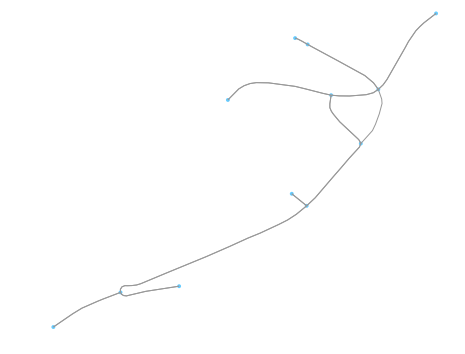

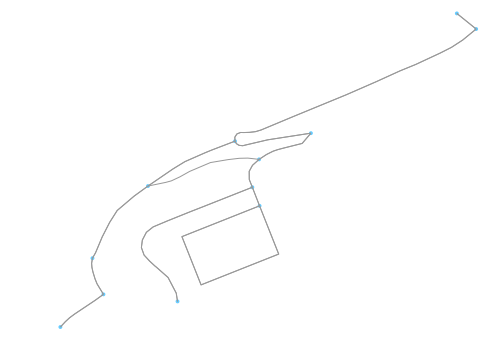

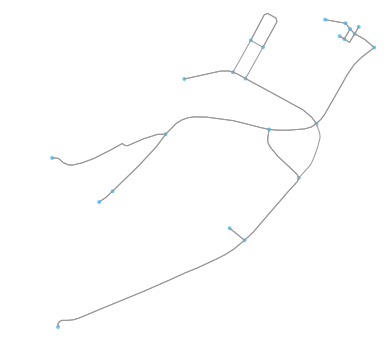

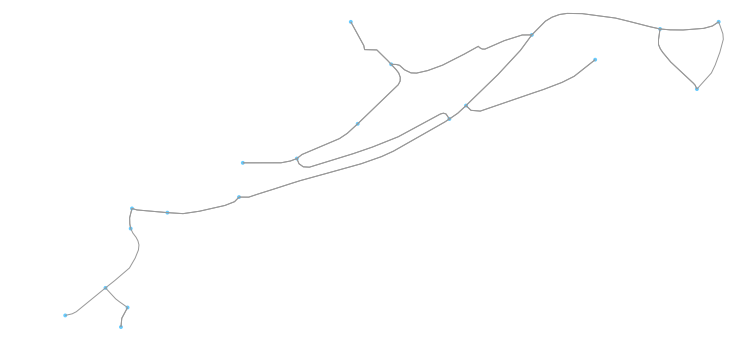

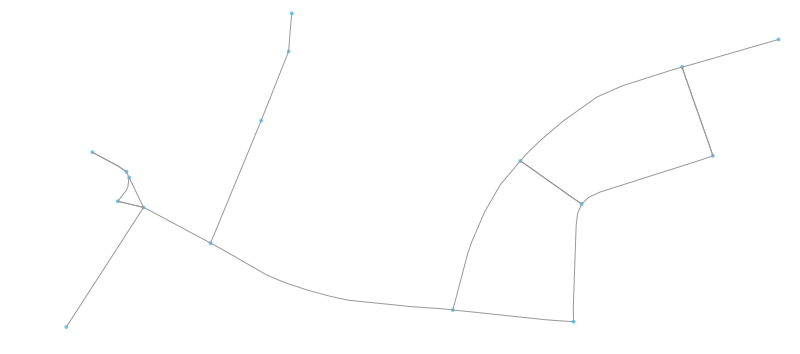

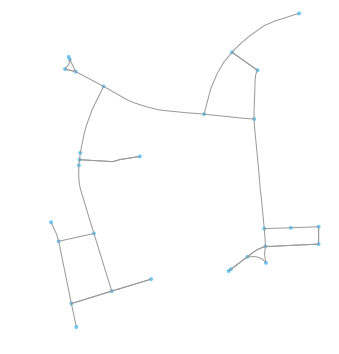

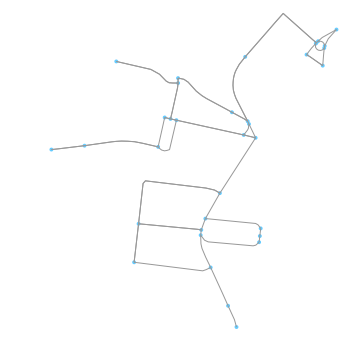

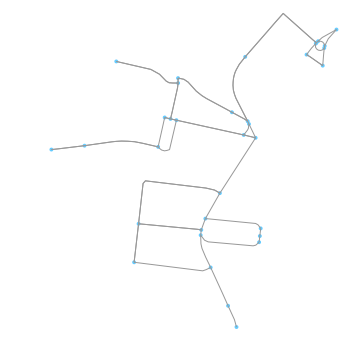

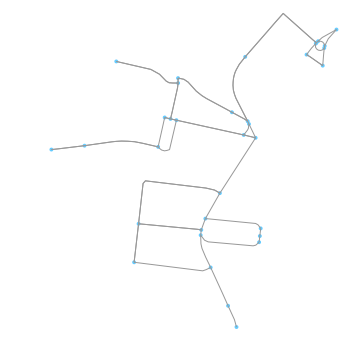

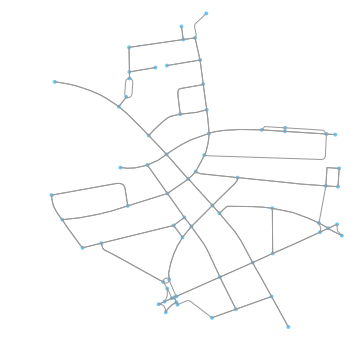

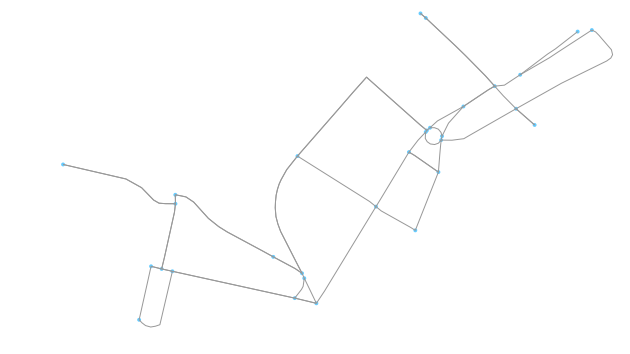

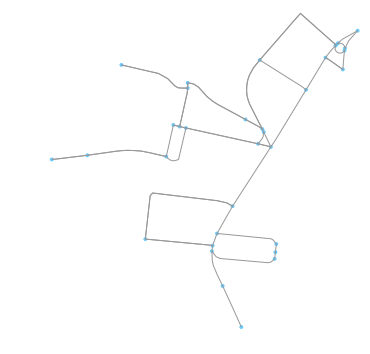

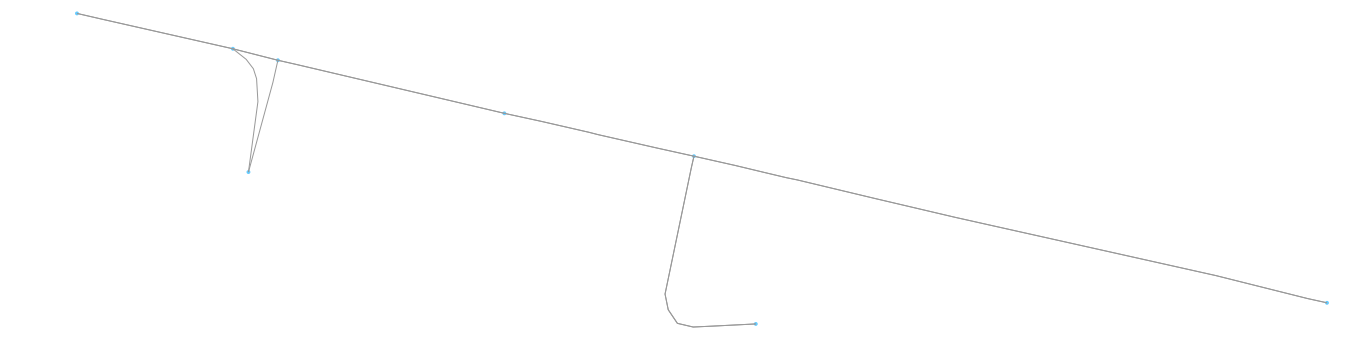

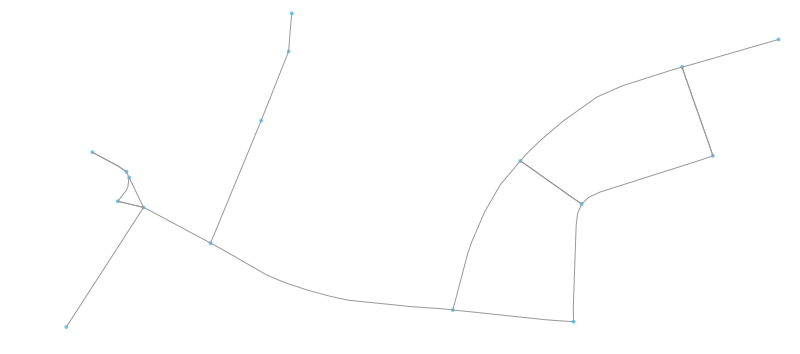

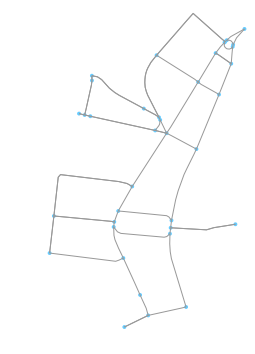

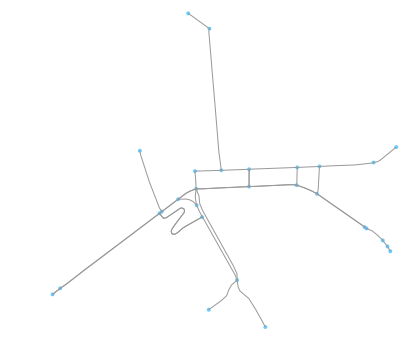

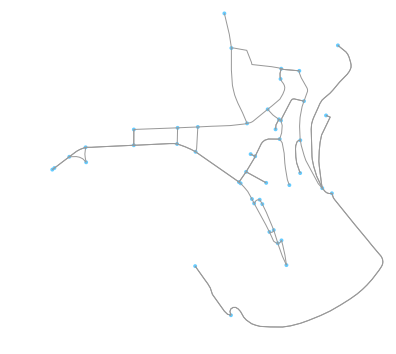

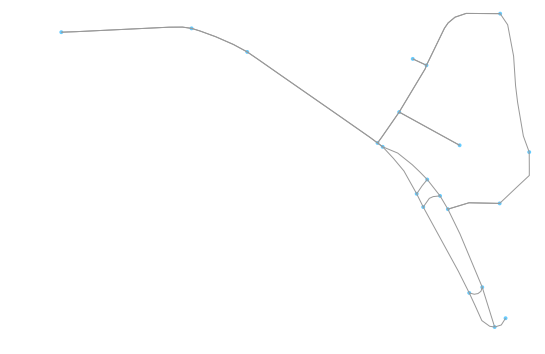

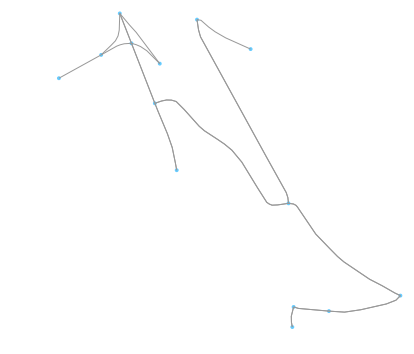

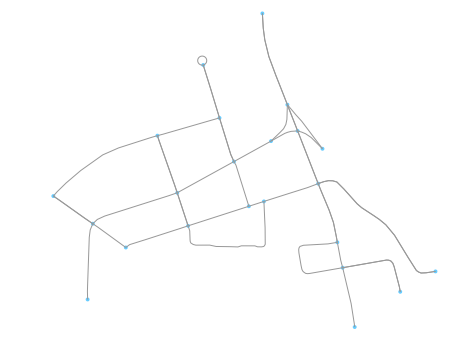

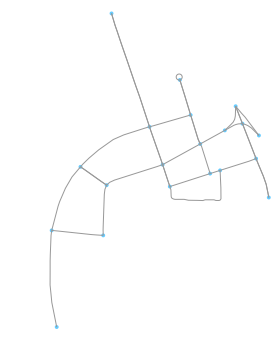

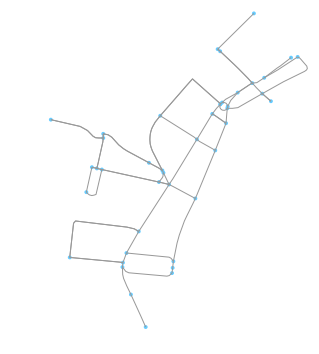

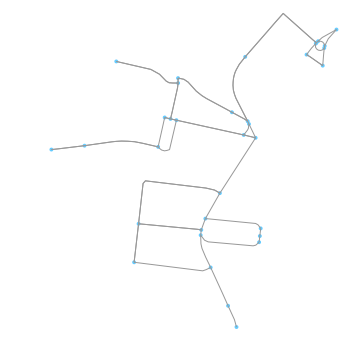

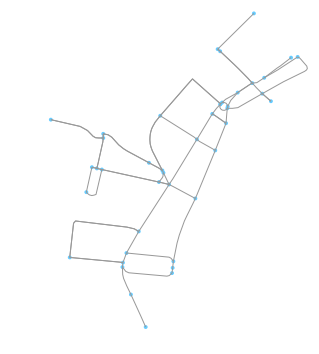

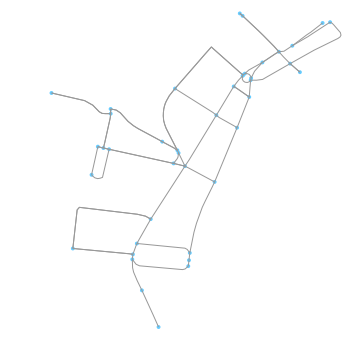

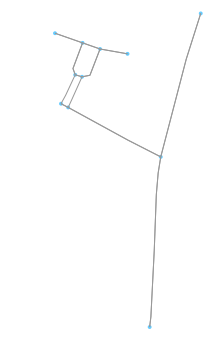

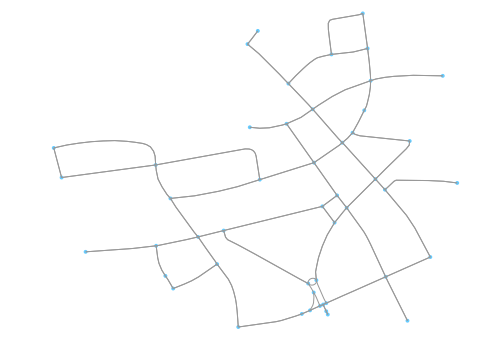

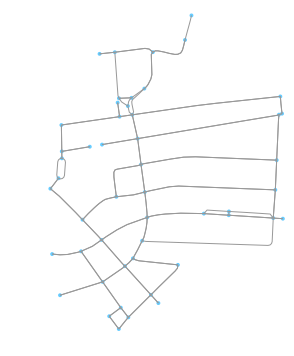

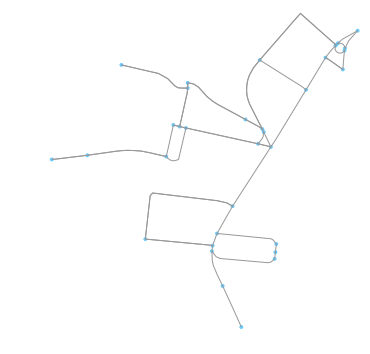

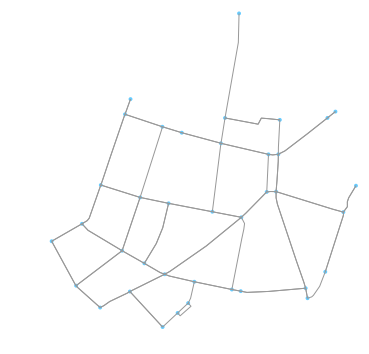

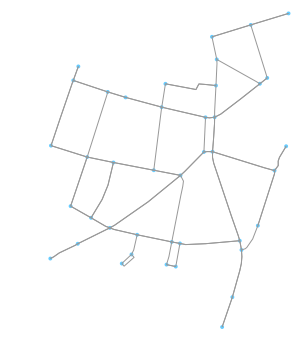

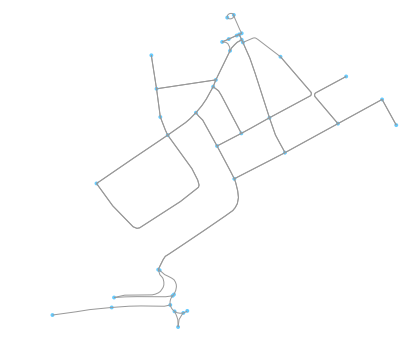

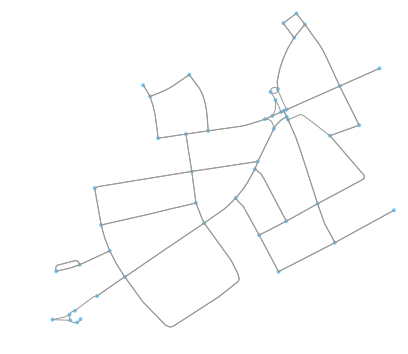

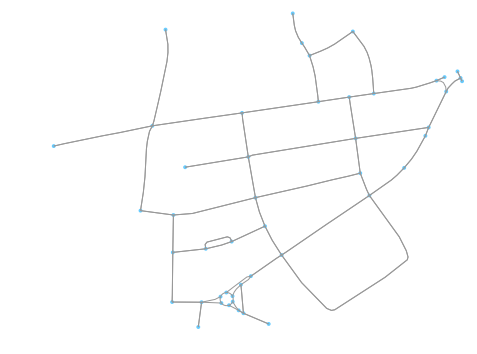

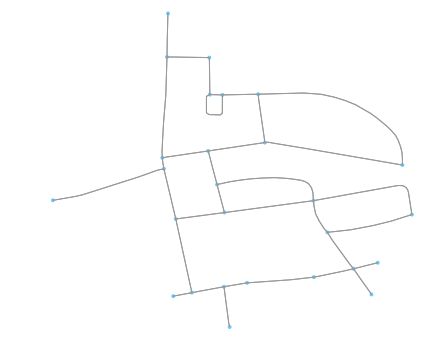

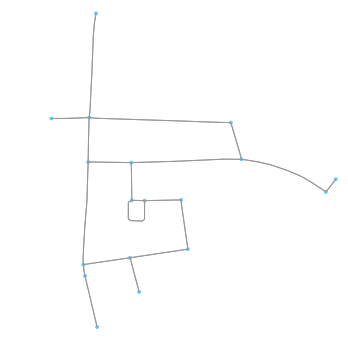

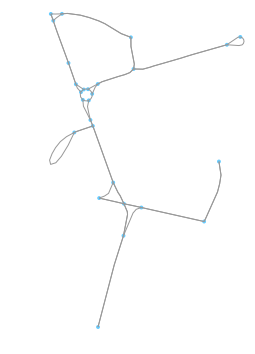

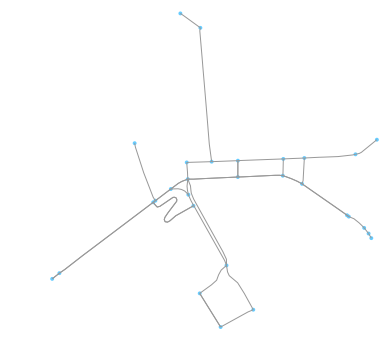

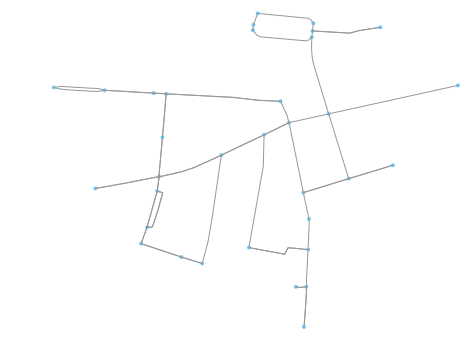

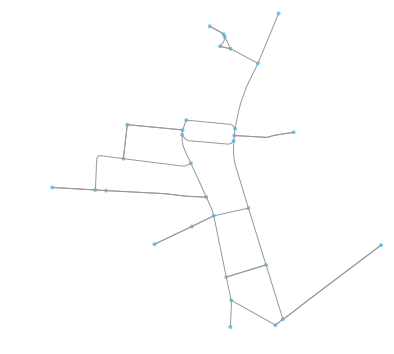

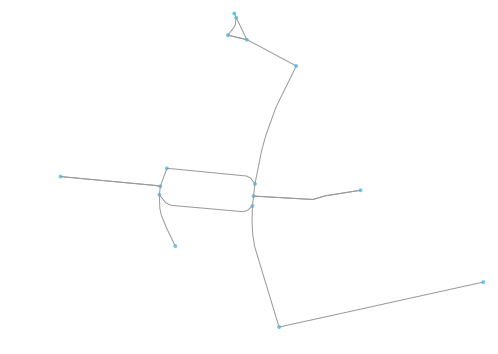

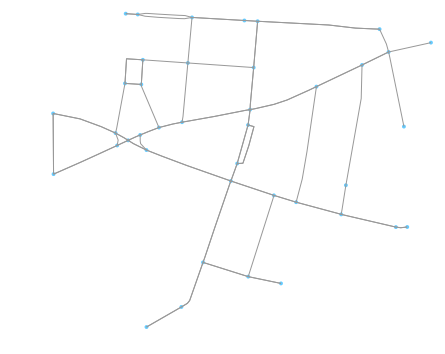

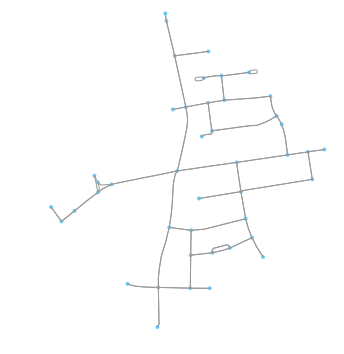

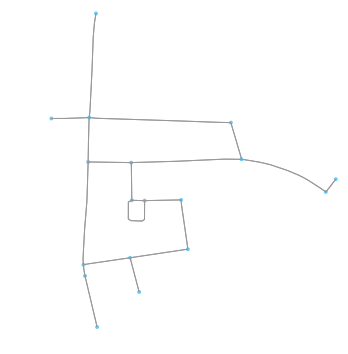

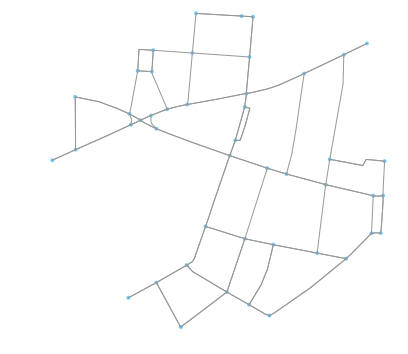

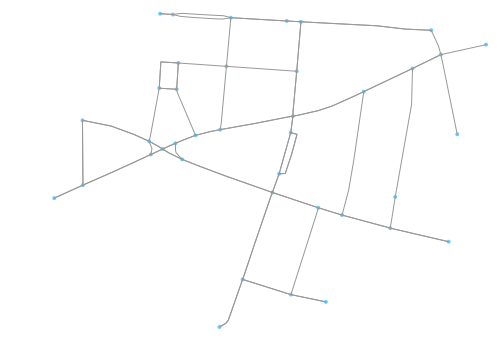

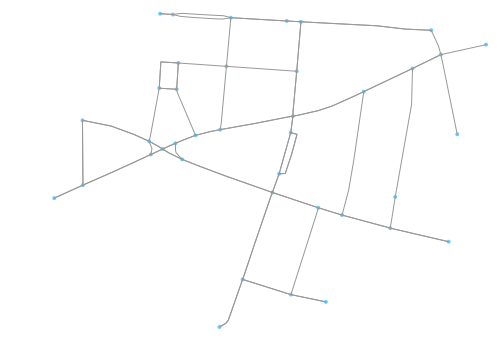

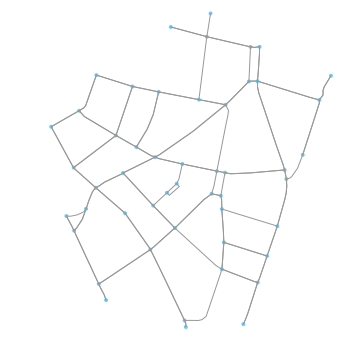

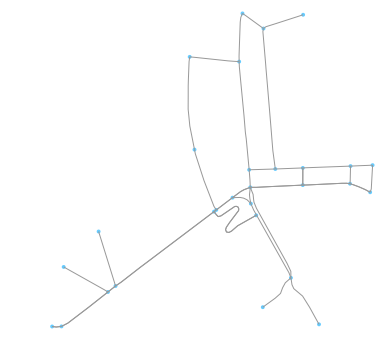

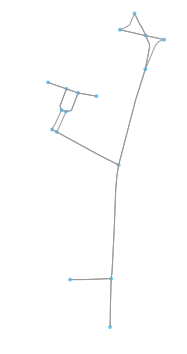

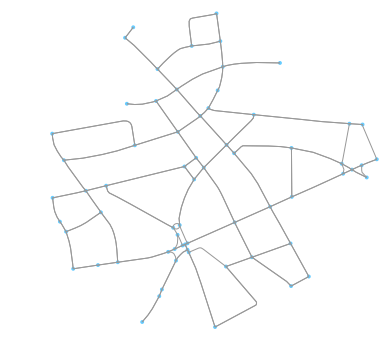

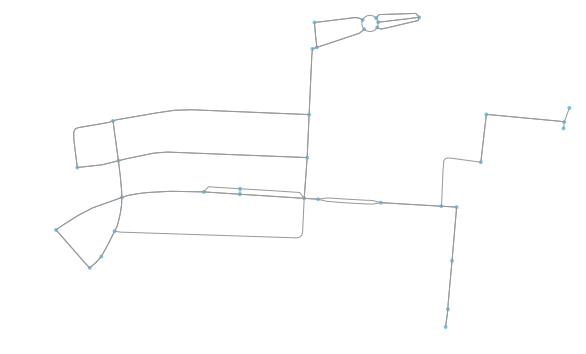

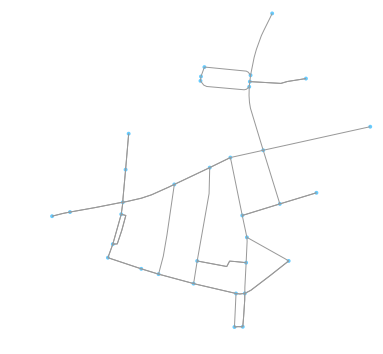

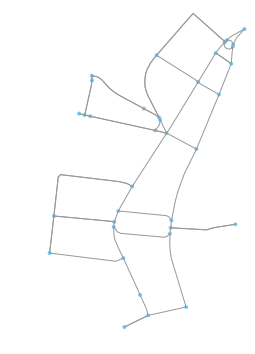

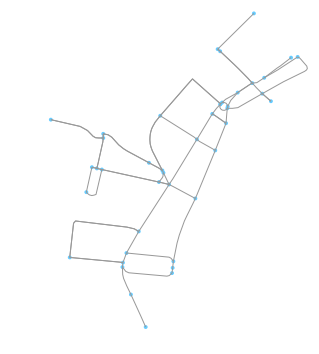

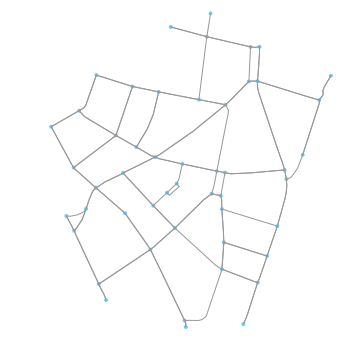

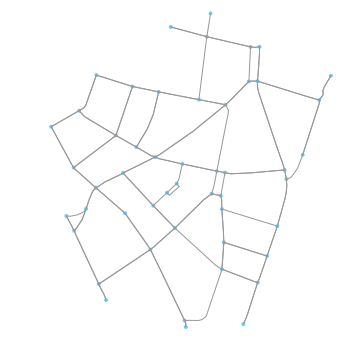

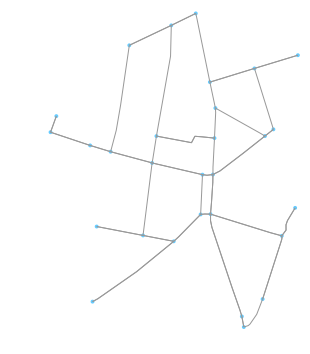

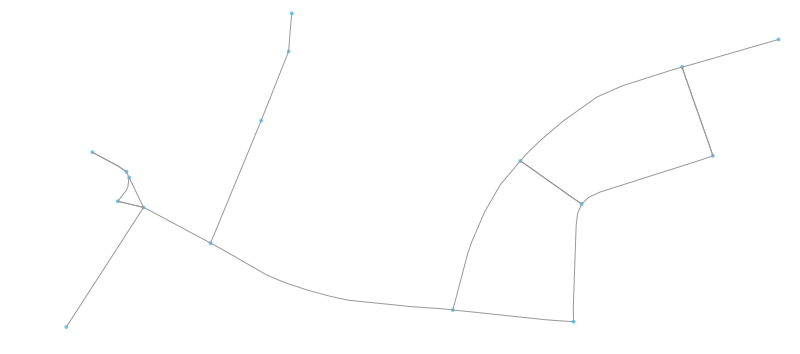

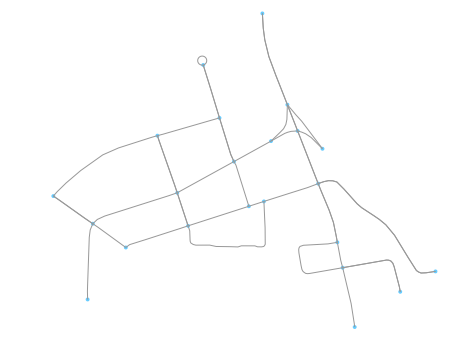

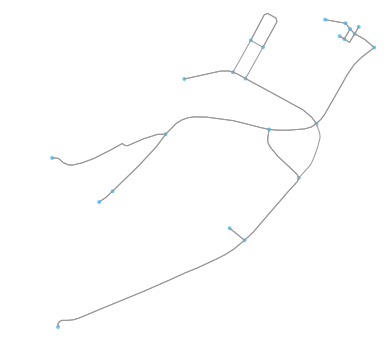

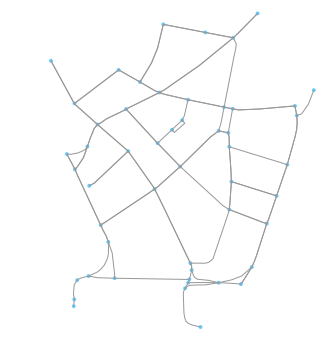

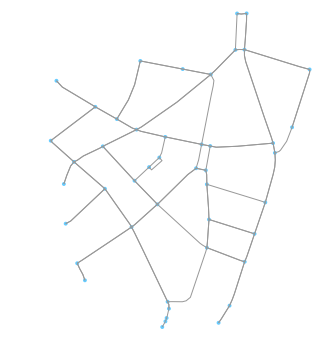

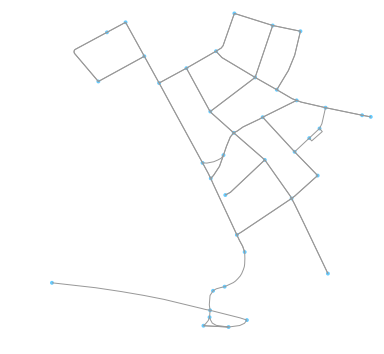

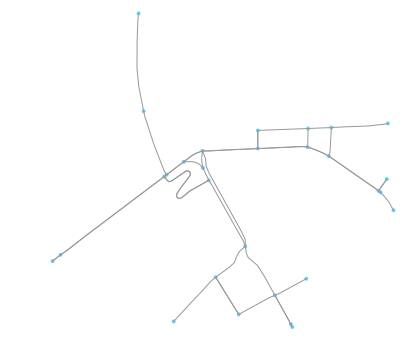

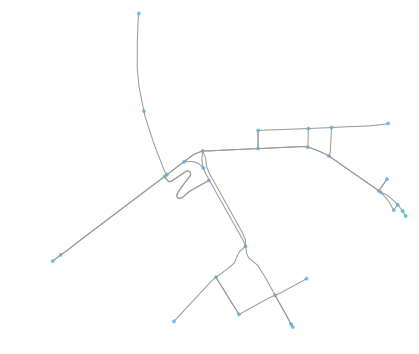

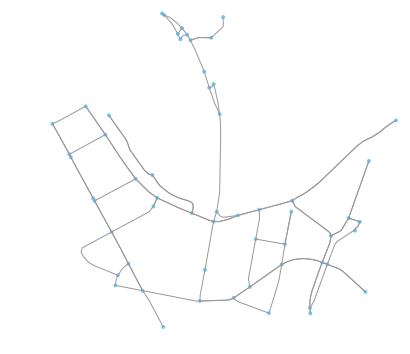

In [151]:
for user in user_individual:
    graphs=[]
    for i in user:
        location=(i[5],i[6])
        G1 = ox.graph_from_point(location, distance=500, distance_type='network', network_type='drive')
        fig, ax = ox.plot_graph(G1)
        #graphs.append(G1)
        eee=G1.edges(data='maxspeed')
        maxspeed=[]
        for j in eee:
            if j[2]==None:
                continue
            if len(j[2])==1:
                maxspeed.append((int(j[2])))
        if maxspeed==[]:
            i.append(50*0.277778)
        else:
            i.append(max(maxspeed)*0.277778)
    
    

In [156]:
user_individual[9]

[['RSUExampleScenario.node[21].appl.85-id',
  35701,
  35743,
  42,
  'RSUExampleScenario.node[21].veinsmobility',
  49.6026,
  6.11726,
  'RSUExampleScenario.node[21].veinsmobility',
  13.888900000000001],
 ['RSUExampleScenario.node[21].appl.151-id',
  35723,
  35774,
  51,
  'RSUExampleScenario.node[36].veinsmobility',
  49.6029,
  6.11771,
  'RSUExampleScenario.node[21].veinsmobility',
  13.888900000000001],
 ['RSUExampleScenario.node[21].appl.103-id',
  35707,
  35807,
  100,
  'RSUExampleScenario.node[25].veinsmobility',
  49.6024,
  6.11342,
  'RSUExampleScenario.node[21].veinsmobility',
  13.888900000000001],
 ['RSUExampleScenario.node[21].appl.444-id',
  35785,
  35828,
  43,
  'RSUExampleScenario.node[45].veinsmobility',
  49.6094,
  6.12643,
  'RSUExampleScenario.node[21].veinsmobility',
  13.888900000000001],
 ['RSUExampleScenario.node[21].appl.849-id',
  35835,
  35879,
  44,
  'RSUExampleScenario.node[21].veinsmobility',
  49.6094,
  6.12619,
  'RSUExampleScenario.node[21]

In [155]:
maxspeed

[]

In [157]:
for user in user_individual:
    for i in user:
        i.insert(4,i[-1]*i[3])

In [158]:
user_individual[0]

[['RSUExampleScenario.node[19].appl.143-id',
  35720,
  35770,
  50,
  694.445,
  'RSUExampleScenario.node[19].veinsmobility',
  49.611,
  6.14193,
  'RSUExampleScenario.node[19].veinsmobility',
  13.888900000000001],
 ['RSUExampleScenario.node[19].appl.231-id',
  35744,
  35793,
  49,
  680.5561,
  'RSUExampleScenario.node[11].veinsmobility',
  49.6111,
  6.13967,
  'RSUExampleScenario.node[19].veinsmobility',
  13.888900000000001],
 ['RSUExampleScenario.node[19].appl.364-id',
  35771,
  35818,
  47,
  652.7783000000001,
  'RSUExampleScenario.node[19].veinsmobility',
  49.6125,
  6.14379,
  'RSUExampleScenario.node[19].veinsmobility',
  13.888900000000001],
 ['RSUExampleScenario.node[19].appl.650-id',
  35814,
  35859,
  45,
  625.0005000000001,
  'RSUExampleScenario.node[81].veinsmobility',
  49.6123,
  6.13865,
  'RSUExampleScenario.node[19].veinsmobility',
  13.888900000000001],
 ['RSUExampleScenario.node[19].appl.1761-id',
  35915,
  35961,
  46,
  638.8894,
  'RSUExampleScenario.

# add uploader delay and distance

In [159]:
for user in user_individual:
    for i in range(len(user)):
        if i==0:
            user[i].extend((0,0))
        else:
            user[i].extend((user[i][2]-user[i-1][2],(user[i][2]-user[i-1][2])*user[i][-1] ))

In [160]:
user_individual[0]


[['RSUExampleScenario.node[19].appl.143-id',
  35720,
  35770,
  50,
  694.445,
  'RSUExampleScenario.node[19].veinsmobility',
  49.611,
  6.14193,
  'RSUExampleScenario.node[19].veinsmobility',
  13.888900000000001,
  0,
  0],
 ['RSUExampleScenario.node[19].appl.231-id',
  35744,
  35793,
  49,
  680.5561,
  'RSUExampleScenario.node[11].veinsmobility',
  49.6111,
  6.13967,
  'RSUExampleScenario.node[19].veinsmobility',
  13.888900000000001,
  23,
  319.4447],
 ['RSUExampleScenario.node[19].appl.364-id',
  35771,
  35818,
  47,
  652.7783000000001,
  'RSUExampleScenario.node[19].veinsmobility',
  49.6125,
  6.14379,
  'RSUExampleScenario.node[19].veinsmobility',
  13.888900000000001,
  25,
  347.2225],
 ['RSUExampleScenario.node[19].appl.650-id',
  35814,
  35859,
  45,
  625.0005000000001,
  'RSUExampleScenario.node[81].veinsmobility',
  49.6123,
  6.13865,
  'RSUExampleScenario.node[19].veinsmobility',
  13.888900000000001,
  41,
  569.4449000000001],
 ['RSUExampleScenario.node[19].

# new user query string - [msg-id, creation time, upload time, delay, distance, created by, creation_x, creation_y, uploader, speed, upload delay, upload distance]

*******************************************************************************
[['RSUExampleScenario.node[19].appl.143-id', 35720, 35770, 50, 694.445, 'RSUExampleScenario.node[19].veinsmobility', 49.611, 6.14193, 'RSUExampleScenario.node[19].veinsmobility', 13.888900000000001, 0, 0], ['RSUExampleScenario.node[19].appl.231-id', 35744, 35793, 49, 680.5561, 'RSUExampleScenario.node[11].veinsmobility', 49.6111, 6.13967, 'RSUExampleScenario.node[19].veinsmobility', 13.888900000000001, 23, 319.4447], ['RSUExampleScenario.node[19].appl.364-id', 35771, 35818, 47, 652.7783000000001, 'RSUExampleScenario.node[19].veinsmobility', 49.6125, 6.14379, 'RSUExampleScenario.node[19].veinsmobility', 13.888900000000001, 25, 347.2225], ['RSUExampleScenario.node[19].appl.650-id', 35814, 35859, 45, 625.0005000000001, 'RSUExampleScenario.node[81].veinsmobility', 49.6123, 6.13865, 'RSUExampleScenario.node[19].veinsmobility', 13.888900000000001, 41, 569.4449000000001], ['RSUExampleScenario.node[19].appl.1761-id

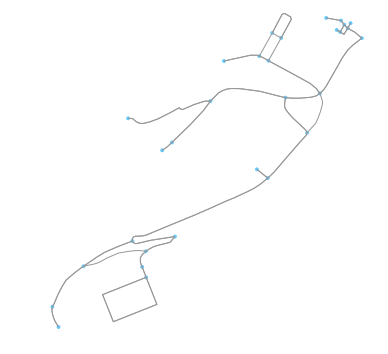

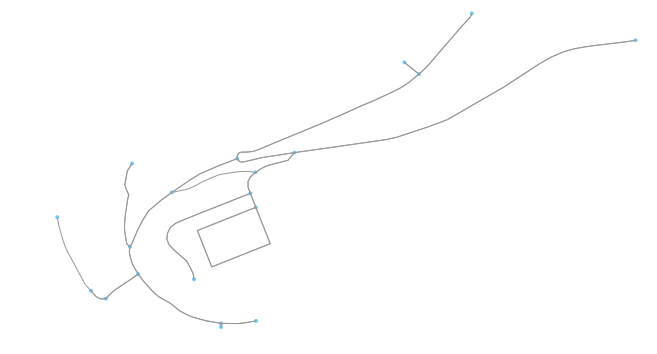

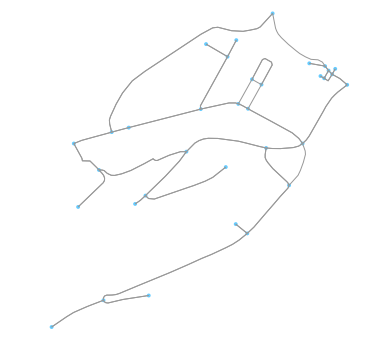

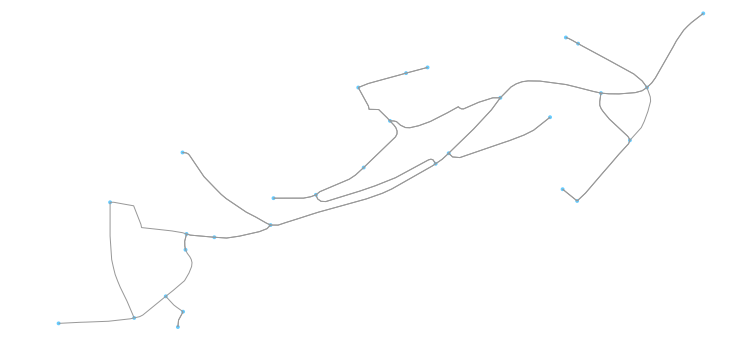

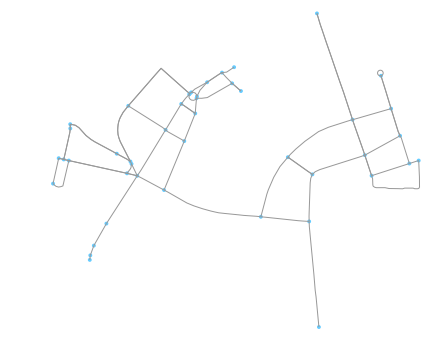

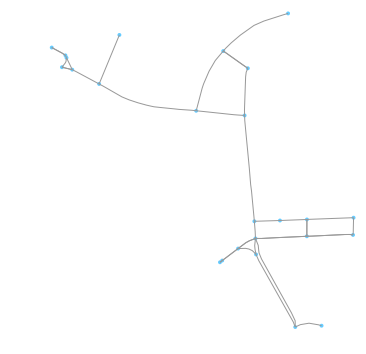

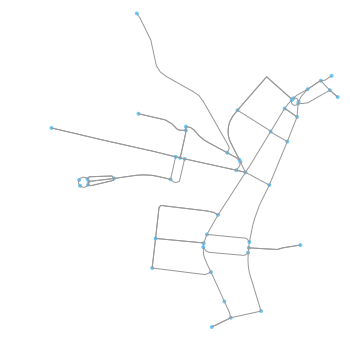

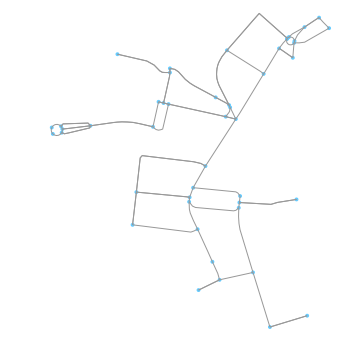

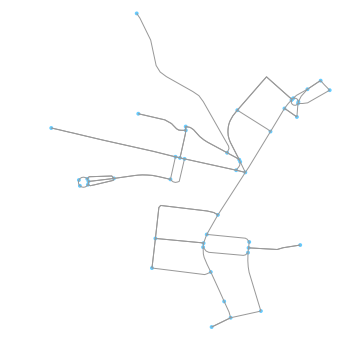

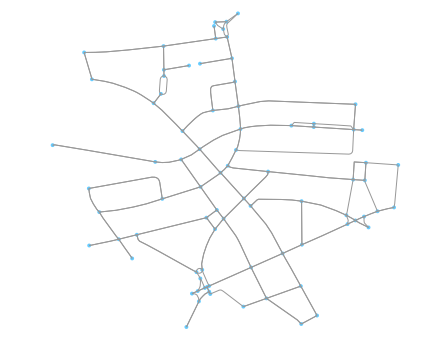

1  data
30
65
{'street_length_total': 3719.842432320014, 'self_loop_proportion': 0.03076923076923077, 'streets_per_node_avg': 8.333333333333334, 'streets_per_node_proportion': {0: 0.0, 1: 0.7, 2: 0.13333333333333333, 3: 2.2333333333333334, 4: 0.16666666666666666}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.2069160804908314, 'streets_per_node_counts': {0: 0, 1: 21, 2: 4, 3: 67, 4: 5}, 'node_density_km': None, 'm': 65, 'n': 30, 'edge_length_total': 6132.176764798562, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 4.333333333333333, 'street_density_km': None, 'street_segments_count': 36, 'street_length_avg': 103.32895645333372, 'intersection_count': 26, 'edge_length_avg': 94.34118099690095}
2  data
20
40
{'street_length_total': 3446.7649126082515, 'self_loop_proportion': 0.05, 'streets_per_node_avg': 14.45, 'streets_per_node_proportion': {0: 0.0, 1: 1.15, 2: 0.35, 3: 3.6, 4: 0.45}, 'clean_intersection_count': None, 'inter

529
set([1252557175, 71243783, 35348501, 75567127, 35348505, 255948832, 361353250, 255948835, 925538343, 276748328, 247325432, 276748335, 271022137, 276658238, 247325707, 71243844, 1298817098, 276658251, 867373132, 262391896, 262391898, 990056556, 252020847, 252020848, 528191602, 990056573, 252020863, 278517895, 255948939, 255948941, 66863246, 1240400031, 1783982251, 4757303468, 519874733, 4757303470, 74983600, 74983602, 74983603, 66912438, 278517944, 71259508, 278517948, 278517953, 1017802946, 252020933, 1989898442, 35350731, 35350732, 252020943, 35350736, 287600850, 2190493907, 75401429, 75401430, 334385371, 720609503, 458885346, 458885347, 255918312, 255949034, 255949035, 534868690, 255949042, 255949045, 252020982, 442007801, 442007802, 69622015, 1280809218, 365703895, 252021008, 252021012, 69042461, 1323458846, 69042473, 71244076, 255949103, 61871157, 252021058, 141636, 141637, 252021064, 1376883017, 71246154, 141644, 66883298, 141646, 141648, 141651, 141656, 1587861849, 69038430, 

405
set([35348501, 1587861849, 2187358236, 255948832, 361353250, 255948835, 491532326, 308121657, 71243844, 247325366, 262391896, 262391898, 990056556, 990056559, 252020848, 1252557160, 528191602, 75551423, 990056573, 252020863, 278517895, 75567127, 255948941, 66863246, 1833298070, 75550877, 75550878, 1240400031, 74983600, 74983601, 74983602, 74983603, 66912438, 278517944, 71259508, 278517948, 409710781, 74983615, 74983616, 278517953, 252020933, 35350730, 66554059, 35350732, 252020943, 35350736, 287600850, 2190493907, 75401429, 75401430, 71259513, 334385371, 720609503, 255949034, 255949035, 255949037, 255949042, 255949045, 252020982, 442007801, 442007802, 75546878, 69622015, 1280809218, 252021008, 252021012, 69042461, 69042462, 255949103, 3448320314, 276650299, 69041205, 252021058, 141636, 141637, 252021064, 1376883017, 75397450, 141644, 75397453, 141646, 141648, 141651, 141657, 141662, 141663, 66910564, 141672, 255949174, 1252557175, 668860792, 117330309, 1234057612, 670044580, 568060

436
set([35348501, 1587861849, 2187358236, 255948832, 361353250, 255948835, 491532326, 308121657, 69045259, 71243844, 247325366, 262391896, 262391898, 990056556, 252020847, 252020848, 1252557160, 528191602, 75551423, 990056573, 252020863, 278517895, 75567127, 255948941, 66863246, 1833298070, 75550874, 75550877, 75550878, 1240400031, 704114855, 704114860, 74983600, 74983601, 74983602, 74983603, 278517944, 4918189428, 278517948, 409710781, 74983615, 74983616, 278517953, 252020933, 35350730, 66554059, 35350732, 252020943, 35350736, 287600850, 2190493907, 75401429, 75401430, 861054329, 334385371, 720609503, 255949034, 255949035, 255949037, 255949042, 255949045, 252020982, 442007801, 442007802, 75546878, 69622015, 1280809218, 252021008, 252021012, 69042461, 69042462, 71244076, 75835695, 3448320314, 276650299, 69041205, 252021058, 141636, 141637, 252021064, 1376883017, 75397450, 141644, 75397453, 141646, 141648, 141651, 141657, 141662, 141663, 141672, 117330290, 255949174, 1252557175, 668860

547
set([75557825, 35348501, 75567127, 35348505, 35348506, 2187358236, 255948832, 275604144, 361353250, 255948835, 491532326, 255370929, 308121657, 35342687, 247325366, 667631702, 262391896, 262391898, 990056556, 252020847, 252020848, 1252557160, 528191602, 75551423, 990056573, 252020863, 278517895, 255948939, 255948941, 66863246, 973871247, 1833298070, 1833298072, 75550874, 75550877, 75550878, 75550879, 4930187425, 704114855, 35348508, 704114860, 74983600, 74983601, 74983602, 74983603, 278517944, 278517948, 409710781, 74983615, 74983616, 278517953, 252020933, 35350730, 66554059, 35350732, 293411022, 252020943, 35350736, 287600850, 2190493907, 75401429, 75401430, 861054329, 647516377, 720609503, 35350757, 255918312, 255949034, 255949035, 255949037, 255949042, 255949045, 252020982, 71510218, 442007801, 442007802, 75385083, 75546878, 69622015, 647495936, 1280809218, 4930187523, 4930187525, 75385094, 4930187530, 252021008, 252021012, 69042461, 252021022, 255947824, 647495971, 635646245, 3

101
set([495447584, 667631702, 1587861087, 1379413777, 75387498, 74996334, 1235668086, 264649849, 443864702, 667557509, 1770796166, 75390601, 75390605, 75388047, 66863763, 66863764, 75388053, 1224147097, 255951015, 74983602, 74983603, 647495868, 280590013, 74983615, 74983616, 621816004, 325145286, 621816007, 647495884, 293411022, 74997458, 69669582, 293411031, 647516377, 75379663, 667557597, 35350751, 1874627812, 35350757, 35350761, 370378483, 4903871224, 75385082, 75385083, 1781357013, 647495936, 454850818, 75385094, 495448839, 454850828, 1379413773, 1379413774, 1379413776, 495448849, 1379413781, 647495971, 443864710, 621781800, 255951147, 255951148, 370378541, 75027249, 3448320314, 326855483, 370152256, 1278530374, 74985297, 141651, 70600533, 2269889367, 141656, 141657, 973871247, 277516650, 141714, 352810866, 1587861370, 4645956477, 294658962, 294658969, 264650144, 71356847, 74991537, 255950770, 5114886067, 1783876542, 75389887, 75389891, 75389899, 75388365, 75378126, 75388367, 7537

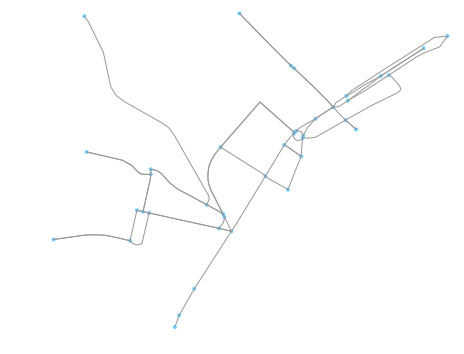

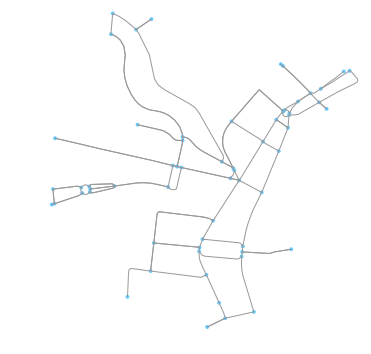

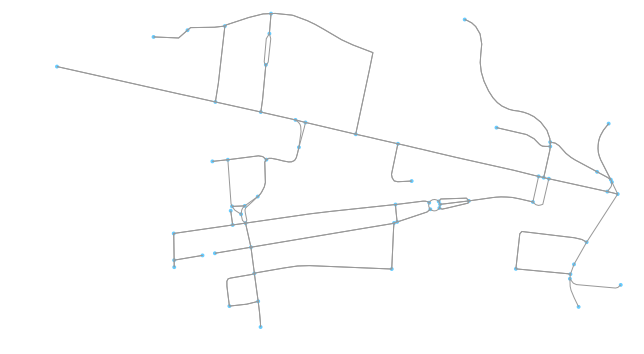

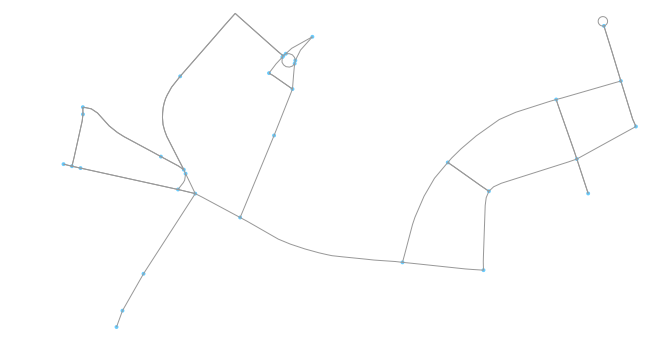

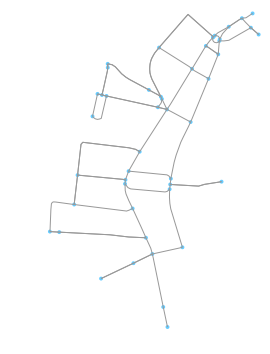

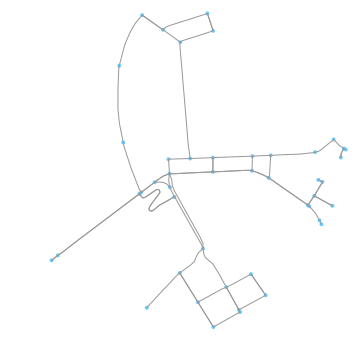

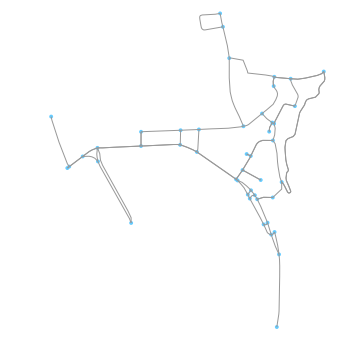

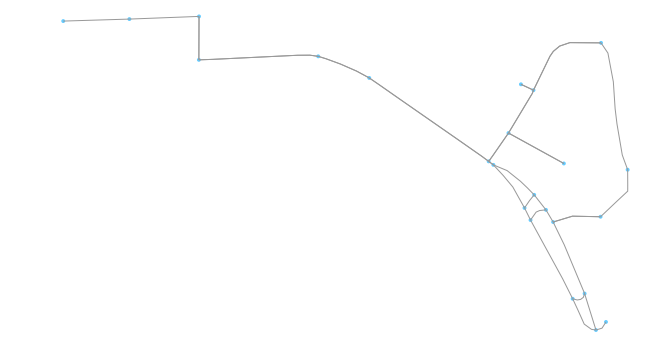

1  data
40
71
{'street_length_total': 4298.698063889059, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 11.425, 'streets_per_node_proportion': {0: 0.0, 1: 0.35, 2: 0.05, 3: 2.75, 4: 0.525, 5: 0.125}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.0503760949615482, 'streets_per_node_counts': {0: 0, 1: 14, 2: 2, 3: 110, 4: 21, 5: 5}, 'node_density_km': None, 'm': 71, 'n': 40, 'edge_length_total': 5941.2264386580955, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 3.55, 'street_density_km': None, 'street_segments_count': 52, 'street_length_avg': 82.66727045940499, 'intersection_count': 38, 'edge_length_avg': 83.67924561490275}
2  data
62
115
{'street_length_total': 7183.736128575404, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 6.806451612903226, 'streets_per_node_proportion': {0: 0.0, 1: 0.16129032258064516, 2: 0.03225806451612903, 3: 1.6290322580645162, 4: 0.3225806451612903, 5: 0.08064516129032258}, 'clean_int

223
set([2262635523, 74983601, 634348042, 71509591, 1374315020, 245974030, 75546127, 245921297, 245921299, 245921300, 35348501, 1587861849, 35348505, 35348506, 35348508, 270689821, 495447584, 74983600, 621830694, 806519335, 71510569, 255947821, 255947824, 70601992, 31003698, 74983603, 255948041, 644746300, 35350794, 247325707, 71509579, 3212623436, 269341261, 71510606, 255947347, 75566595, 247325269, 667631702, 247325271, 1020130905, 247325275, 269341131, 1587861087, 1374315019, 71509602, 66907750, 71509607, 75387498, 1378101869, 74996334, 1235668086, 264649849, 443864702, 667557509, 443864710, 255950471, 75390601, 1098872258, 66863246, 75388047, 75543184, 504618130, 66863763, 66863764, 75388053, 1240400031, 4930187425, 66596004, 1020108486, 71510695, 66593960, 1378101931, 66593964, 69669552, 141714, 74983602, 247325363, 247325365, 247325366, 370155704, 71509892, 647495868, 280590013, 255947454, 74983615, 74983616, 268552907, 1319849158, 75381239, 1319849161, 71510218, 35350731, 647495

137
set([75566593, 75566594, 75566595, 955361796, 1327268870, 634348042, 1374315019, 1374315020, 1280809218, 75546126, 75546127, 276868867, 1587862036, 66554059, 270689821, 572543529, 278516785, 252019762, 61871157, 644746300, 75550496, 275971139, 291723849, 955361806, 252020665, 262391896, 66586201, 262391898, 278516828, 278516832, 66907750, 990056556, 634348142, 252020847, 252020848, 528191602, 443497076, 990056573, 290288257, 255950468, 278517895, 266223240, 504618121, 651375756, 251307458, 504618130, 252019864, 990056559, 1240400031, 66593964, 75395016, 1350817460, 278517944, 278517948, 280590013, 278517953, 35350731, 534868676, 35350730, 268552907, 35350732, 35350736, 287600850, 75401429, 75401430, 720609503, 77600490, 75547092, 534868690, 1232409838, 492793694, 442007801, 442007802, 647124693, 438250754, 634341123, 527956753, 1474547476, 527956757, 252021022, 5509661984, 252019799, 255950471, 71259444, 25609525, 278517055, 25609536, 141636, 141637, 634220361, 75397450, 75564364, 

133
set([1327268870, 1374315019, 1374315020, 1280809218, 75546126, 75546127, 276868867, 270689821, 252019234, 252019749, 572543529, 252019762, 1361212981, 252019264, 275971139, 291723849, 252019793, 252019799, 262391896, 262391898, 252020319, 252020320, 527956753, 990056556, 990056559, 252020848, 528191602, 836712052, 990056573, 252020863, 290288257, 278517895, 266223240, 504618121, 836712074, 651375756, 836712083, 252019864, 252019866, 252019867, 1321097885, 1240400031, 75395016, 1350817460, 252020681, 278517944, 278517948, 955361804, 836712129, 35350731, 252020933, 268552907, 35350732, 252020943, 252020944, 75401429, 75401430, 720609503, 35350736, 252021480, 252019946, 252019947, 252019948, 252019949, 1232409838, 1372306165, 252020982, 66586580, 252019964, 438250754, 634341123, 276868843, 252021008, 252020696, 252021012, 527956757, 252019990, 25609495, 25609496, 252021022, 75835695, 288747314, 71259444, 278517055, 287432001, 252021058, 141636, 141637, 252021064, 634220361, 141644, 14

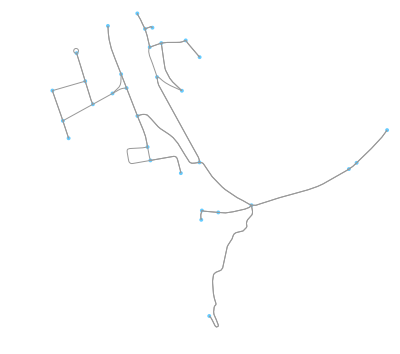

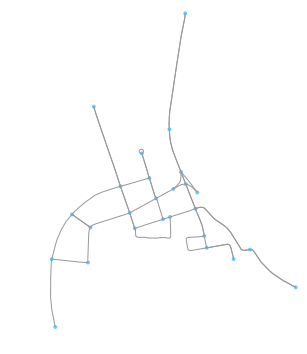

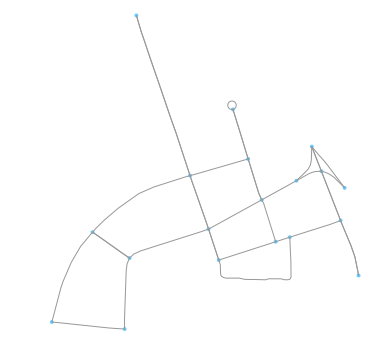

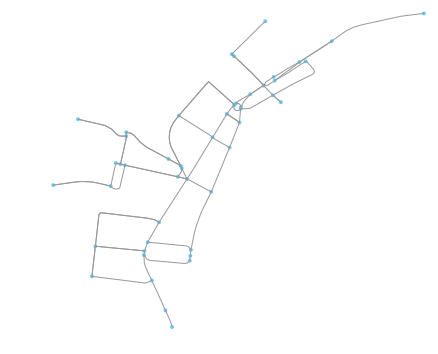

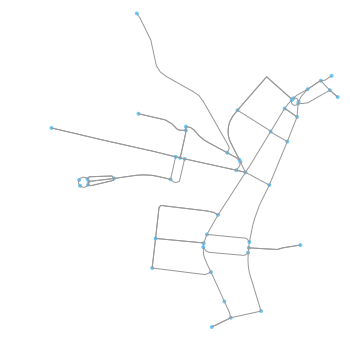

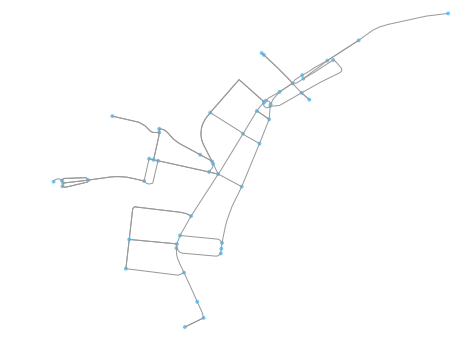

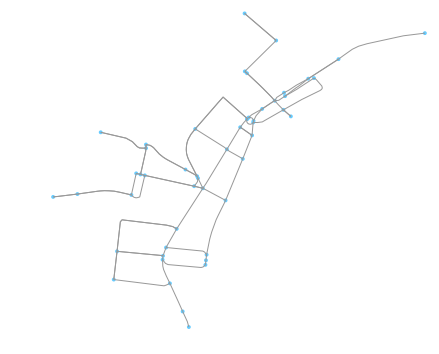

1  data
32
62
{'street_length_total': 3852.4221476975904, 'self_loop_proportion': 0.016129032258064516, 'streets_per_node_avg': 12.21875, 'streets_per_node_proportion': {0: 0.0, 1: 0.5625, 2: 0.21875, 3: 2.875, 4: 0.53125, 5: 0.09375}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.082654068245138, 'streets_per_node_counts': {0: 0, 1: 18, 2: 7, 3: 92, 4: 17, 5: 3}, 'node_density_km': None, 'm': 62, 'n': 32, 'edge_length_total': 6987.07921257824, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 3.875, 'street_density_km': None, 'street_segments_count': 35, 'street_length_avg': 110.06920421993115, 'intersection_count': 30, 'edge_length_avg': 112.69482600932645}
2  data
26
49
{'street_length_total': 4172.371103861491, 'self_loop_proportion': 0.02040816326530612, 'streets_per_node_avg': 12.346153846153847, 'streets_per_node_proportion': {0: 0.0, 1: 0.3076923076923077, 2: 0.15384615384615385, 3: 2.6923076923076925, 4: 0.769230769

104
set([1327268870, 634348042, 1374315019, 1374315020, 1280809218, 75546126, 75546127, 276868867, 1587862036, 270689821, 572543529, 252019762, 291723849, 252019799, 262391896, 66586201, 262391898, 634348142, 252020847, 252020848, 528191602, 443497076, 290288257, 255950468, 278517895, 266223240, 651375756, 1098872258, 66863246, 75543184, 504618130, 252019864, 252019867, 1240400031, 66593960, 1783876552, 1350817460, 278517944, 278517948, 278517953, 268552907, 534868676, 35350730, 66554059, 35350732, 35350736, 287600850, 647124693, 75401430, 720609503, 77600490, 75547092, 534868690, 1232409838, 442007801, 442007802, 75401429, 438250754, 634341123, 527956753, 1474547476, 527956757, 35350731, 75550496, 255950471, 71259444, 25609525, 278517055, 25609536, 141636, 141637, 634220361, 75397450, 141644, 75397453, 141646, 141648, 75566938, 71259484, 141662, 75545965, 2846819562, 2205912452, 4887471517, 1251610033, 75569075, 75570104, 1251610041, 5373158337, 71248322, 75395016, 66586576, 252019704

285
set([75566593, 75566594, 75566595, 955361796, 75567543, 1327268870, 276649644, 634348042, 1374315019, 1374315020, 1280809218, 955361806, 75546127, 318409817, 25609454, 276868867, 1587862036, 703983125, 66554059, 75567127, 2019936795, 2187358236, 270689821, 255948832, 1802924577, 252019234, 75567544, 276648485, 445083517, 572543529, 75551790, 75551791, 75551792, 278516785, 252019762, 5114886067, 61871156, 61871157, 252019866, 308121657, 644746300, 75550496, 252019264, 280590013, 275971139, 75557825, 291723849, 66588087, 3212623436, 318409805, 252020664, 2269889367, 75546126, 252019799, 262391896, 66586201, 836712129, 278516828, 255949042, 278516832, 255370404, 66907750, 990056556, 634348142, 252020847, 252020848, 528191602, 2019936787, 443497076, 252021012, 69040831, 990056573, 25609493, 1419609216, 290288257, 255950468, 278517895, 266223240, 504618121, 836712074, 651375756, 251307458, 66863246, 75543184, 504618130, 66863763, 66863764, 252019864, 836712083, 255370394, 252019867, 132

109
set([1374315019, 1374315020, 438250754, 75546127, 1587862036, 1587861849, 75569075, 3212623436, 66586201, 262391898, 1587861087, 75395016, 75387498, 74996334, 443497076, 1235668086, 75551423, 728372871, 266223240, 75390601, 651375756, 66863246, 75388047, 75543184, 66863763, 66863764, 621839509, 1240400031, 66596004, 66593960, 66593964, 74983600, 74983601, 74983602, 74983603, 647495868, 280590013, 74983615, 74983616, 268552907, 35350732, 66554059, 647495884, 74997458, 647124693, 75401430, 293411031, 1874627812, 2846819562, 370378483, 2846819572, 2846819577, 647495936, 1280809218, 527956753, 35350731, 75550496, 647495971, 370378541, 75027249, 71259444, 25609525, 3448320314, 276650299, 25609536, 141637, 1278530374, 634220361, 75397450, 141646, 141648, 74985297, 141651, 70600533, 2269889367, 141656, 141657, 75551578, 141662, 141663, 141672, 1587861370, 4887471517, 74991537, 5114886067, 634345972, 1783876542, 1098872258, 1783876552, 75389899, 75388365, 75378126, 75388367, 452619729, 753

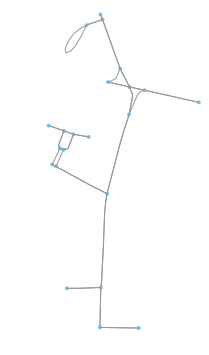

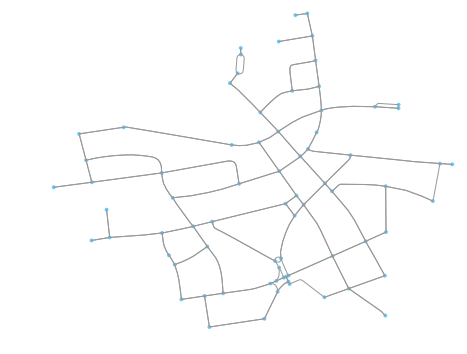

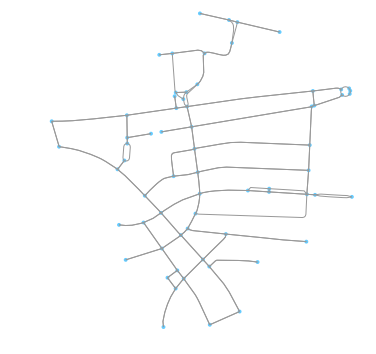

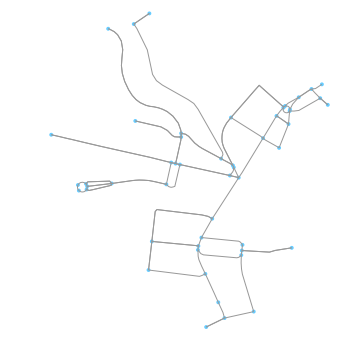

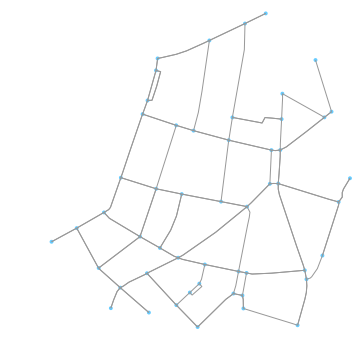

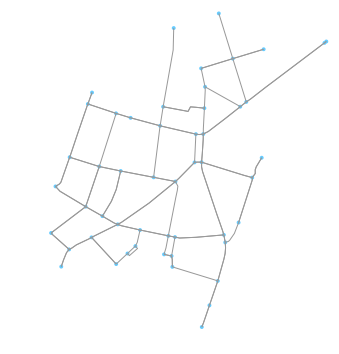

1  data
22
47
{'street_length_total': 1841.797654821933, 'self_loop_proportion': 0.02127659574468085, 'streets_per_node_avg': 7.590909090909091, 'streets_per_node_proportion': {0: 0.0, 1: 0.18181818181818182, 2: 0.18181818181818182, 3: 2.227272727272727, 4: 0.09090909090909091}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.0595038097590461, 'streets_per_node_counts': {0: 0, 1: 4, 2: 4, 3: 49, 4: 2}, 'node_density_km': None, 'm': 47, 'n': 22, 'edge_length_total': 3323.548055694133, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 4.2727272727272725, 'street_density_km': None, 'street_segments_count': 26, 'street_length_avg': 70.83837133930511, 'intersection_count': 20, 'edge_length_avg': 70.7137884190241}
2  data
74
189
{'street_length_total': 8581.639987468749, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 5.756756756756757, 'streets_per_node_proportion': {0: 0.0, 1: 0.0945945945945946, 2: 0.04054054054054054, 3: 1.

579
set([71243783, 35348492, 35348501, 75567127, 35348505, 35348506, 35348508, 670044599, 255948832, 275604144, 255948835, 925538343, 276748328, 255371309, 276748335, 69038430, 141663, 71243844, 667631702, 262391896, 262391898, 275955818, 990056556, 252020847, 252020848, 528191602, 275955828, 75551423, 990056573, 252020863, 3990206596, 3990206598, 278517895, 270585992, 255948939, 255948941, 66863246, 1583925404, 1240400031, 4930187425, 1783982251, 4757303468, 519874733, 4757303470, 74983600, 74983601, 74983602, 74983603, 66912438, 278517944, 4918189428, 278517948, 74983615, 74983616, 278517953, 252020933, 2361037002, 35350731, 647495884, 252020943, 35350736, 287600850, 2190493907, 75401429, 75401430, 647516377, 720609503, 289675493, 255918312, 255949034, 255949035, 255949037, 255949042, 255949045, 255918329, 442007802, 69622015, 647495936, 1280809218, 4930187523, 4930187525, 4930187530, 2040656599, 255947821, 275955985, 275955994, 69042461, 69042462, 647495971, 635646245, 69042473, 712

305
set([75566593, 75566594, 75566595, 955361796, 1327268870, 276649644, 634348042, 1374315019, 1374315020, 1280809218, 75546126, 75546127, 276868867, 1587862036, 66554059, 66586201, 66596004, 2019936795, 2187358236, 262391898, 255948832, 252019234, 75567544, 252019749, 445083517, 572543529, 1783876552, 75551790, 75551791, 278516785, 252019762, 288540669, 61871156, 1361212981, 252019866, 308121657, 644746300, 252019264, 278516832, 280590013, 275971139, 75557825, 442007801, 291723849, 75567543, 3212623436, 318409805, 252019793, 955361806, 1419609235, 252019799, 262391896, 318409817, 836712129, 278516828, 75567546, 252020319, 252020320, 252021008, 66907750, 66907754, 990056556, 634348142, 990056559, 252020848, 528191602, 2019936787, 443497076, 1783876542, 252021012, 69040831, 990056573, 25609493, 1419609216, 290288257, 634364412, 255949045, 255950468, 252019990, 278517895, 266223240, 504618121, 836712074, 75567127, 651375756, 251307458, 66863246, 75543184, 255949399, 504618130, 66863763,

360
set([75557825, 71243783, 75567127, 255948832, 361353250, 255948835, 925538343, 276748328, 276748335, 271022137, 71243844, 262391896, 262391898, 990056556, 252020847, 252020848, 528191602, 990056573, 252020863, 278517895, 255948939, 255948941, 1240400031, 4757303468, 519874733, 4757303470, 278517944, 278517948, 278517953, 252020933, 2361037002, 35350731, 35350732, 252020943, 35350736, 287600850, 2190493907, 720609503, 255949034, 255949035, 255949037, 255949042, 255949045, 252020982, 69622015, 2040656599, 252021008, 252021012, 69042461, 69042462, 69042473, 71244076, 75835695, 69041205, 252021058, 141636, 141637, 252021064, 71246154, 141644, 141646, 141648, 69038430, 69038432, 69038439, 1252557160, 69038446, 69038447, 255949174, 1252557175, 668860792, 117330309, 1234057612, 568060325, 69040550, 69040551, 1252557224, 69040554, 69040555, 413487534, 413487535, 289868209, 75567542, 75567543, 75567544, 75567546, 69040572, 71248322, 271022541, 271022542, 271022545, 71248338, 271022547, 2693

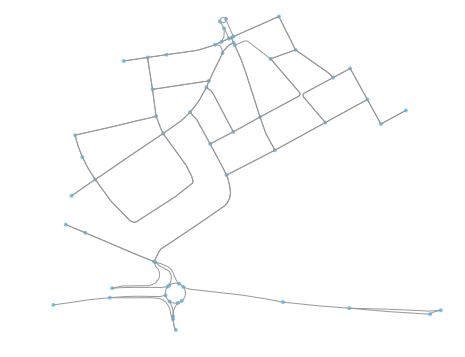

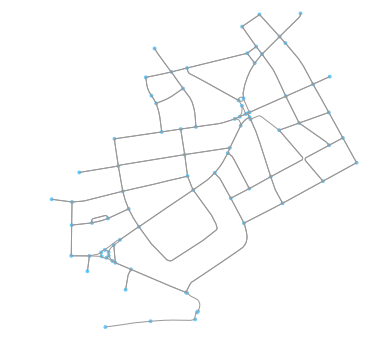

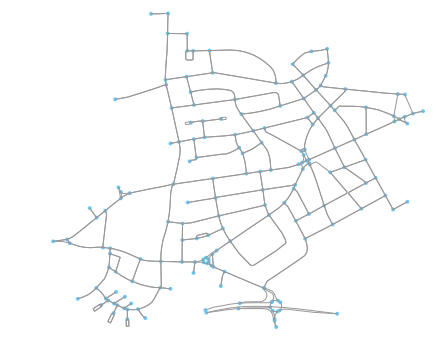

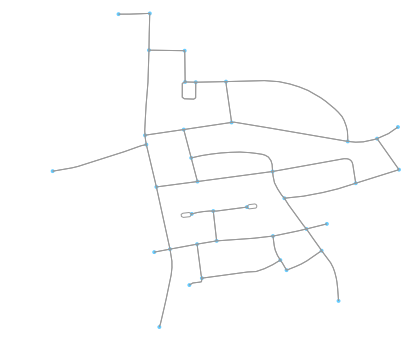

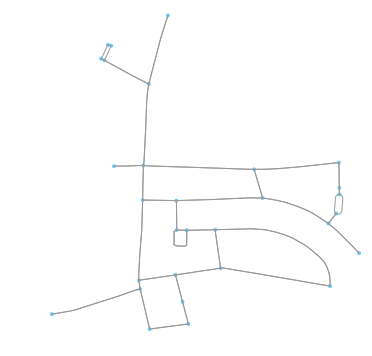

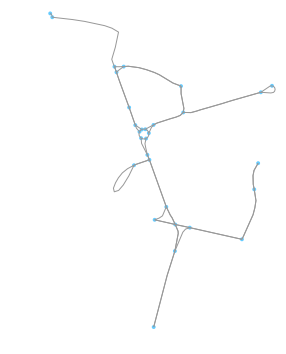

1  data
60
130
{'street_length_total': 7420.505324413607, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 5.366666666666666, 'streets_per_node_proportion': {0: 0.0, 1: 0.06666666666666667, 2: 0.0, 3: 1.3833333333333333, 4: 0.26666666666666666, 5: 0.016666666666666666}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.092294402528941, 'streets_per_node_counts': {0: 0, 1: 4, 2: 0, 3: 83, 4: 16, 5: 1}, 'node_density_km': None, 'm': 130, 'n': 60, 'edge_length_total': 12434.56756725845, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 4.333333333333333, 'street_density_km': None, 'street_segments_count': 79, 'street_length_avg': 93.93044714447603, 'intersection_count': 60, 'edge_length_avg': 95.65051974814192}
2  data
84
212
{'street_length_total': 10027.041567251075, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 5.595238095238095, 'streets_per_node_proportion': {0: 0.0, 1: 0.08333333333333333, 2: 0.0, 3: 1.357142857142

50
set([445083520, 69045253, 836712074, 69045259, 252020369, 836712083, 512021782, 445083545, 252020508, 445083549, 117330309, 512021793, 361353250, 512021795, 512021797, 512021799, 445083548, 445083517, 512021803, 270588845, 413487534, 527956790, 836712052, 708021188, 1102589255, 638043127, 1422587084, 4918200021, 71248346, 334385371, 4918200029, 262391774, 1098872419, 836246500, 252021222, 252020457, 252021226, 638043115, 271021676, 638043117, 638043119, 638043122, 4918189428, 117330290, 638043126, 1395852919, 668860792, 252020348, 252020349, 252020863])
50
39
set([290139908, 69045253, 271021676, 270588845, 252020369, 445083545, 276748335, 252020508, 445083549, 288704159, 276748328, 445083548, 61871149, 288704174, 75835695, 252019956, 252020348, 1422587084, 252020305, 71248338, 288536020, 4918200021, 288536026, 288537564, 4918200029, 262391774, 71248346, 252020321, 288704220, 252020457, 252019948, 252019949, 252020349, 252019952, 288537715, 4918189428, 1395852919, 252019964, 25202026

223
set([69045253, 1327268870, 71243783, 69045259, 901522861, 71248322, 262391896, 413487534, 290139908, 361353250, 61871140, 252019749, 289868326, 925538343, 276748328, 252019661, 61871147, 61871149, 61871150, 276748335, 69037616, 252019762, 61871155, 69037620, 69041205, 69037622, 1298844727, 69037624, 271022137, 901523007, 252019264, 71243844, 1298844743, 1017802946, 528598601, 1298844746, 252020305, 528599635, 252019867, 445121621, 252019799, 1298817112, 901523037, 252020319, 252020320, 252020321, 1098872419, 271021676, 252020847, 869381553, 528191602, 288537715, 836712052, 1395852919, 252020348, 252020349, 252020863, 278517895, 664467308, 836712074, 69040781, 252020369, 836712083, 252019859, 1252410519, 252019864, 252019866, 990056559, 1321097885, 288704159, 519874733, 288704174, 69042461, 1350817460, 252019657, 69040831, 836712129, 251866306, 252020933, 1422587084, 271022541, 252020944, 2040656594, 2190493907, 4918200021, 365703895, 252020943, 288704220, 4918200029, 35350736, 7124

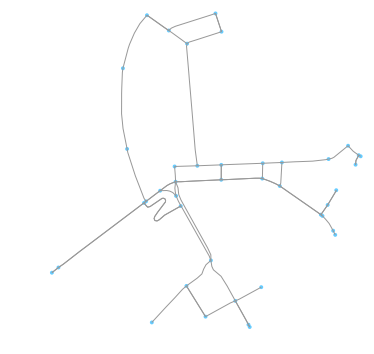

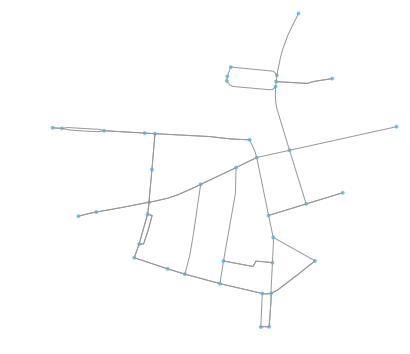

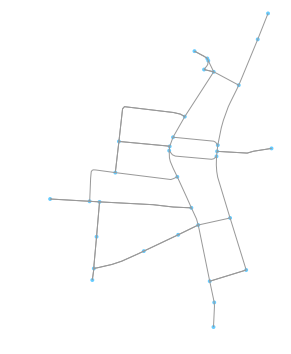

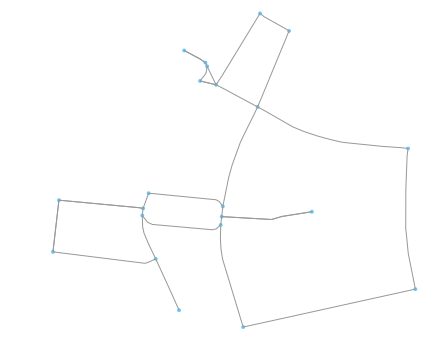

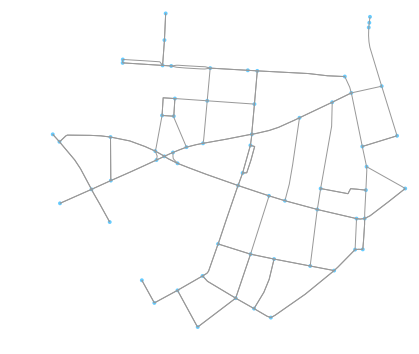

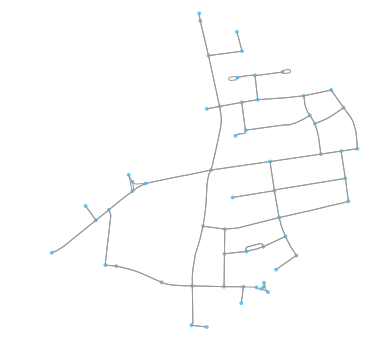

1  data
42
69
{'street_length_total': 4616.168290819232, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 8.952380952380953, 'streets_per_node_proportion': {0: 0.0, 1: 0.16666666666666666, 2: 0.14285714285714285, 3: 1.9761904761904763, 4: 0.5238095238095238, 5: 0.09523809523809523}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.0459156940836027, 'streets_per_node_counts': {0: 0, 1: 7, 2: 6, 3: 83, 4: 22, 5: 4}, 'node_density_km': None, 'm': 69, 'n': 42, 'edge_length_total': 6180.932156795536, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 3.2857142857142856, 'street_density_km': None, 'street_segments_count': 49, 'street_length_avg': 94.207516139168, 'intersection_count': 41, 'edge_length_avg': 89.57872691008023}
2  data
40
77
{'street_length_total': 4853.731410255278, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 8.125, 'streets_per_node_proportion': {0: 0.0, 1: 0.1, 2: 0.05, 3: 1.85, 4: 0.5, 5: 0.075}, 'clean

466
set([71243783, 35348501, 75567127, 35348505, 35348506, 255948832, 255948835, 925538343, 276748328, 276748335, 141662, 69045259, 71243844, 667631702, 262391896, 262391898, 990056556, 990056559, 252020848, 528191602, 990056573, 252020863, 278517895, 255948939, 255948941, 66863246, 1240400031, 4930187425, 1783982251, 4757303468, 519874733, 4757303470, 74983600, 74983602, 74983603, 66912438, 278517944, 278517948, 278517953, 252020933, 2361037002, 35350731, 647495884, 252020943, 35350736, 287600850, 2190493907, 75401429, 75401430, 720609503, 255918312, 255949034, 255949035, 534868690, 255949042, 255949045, 252020982, 255918329, 442007802, 69622015, 647495936, 1280809218, 4930187523, 4930187525, 365703895, 69042461, 69042462, 647495971, 69042473, 71244076, 75835695, 69041205, 252021058, 141636, 141637, 252021064, 1376883017, 71246154, 141644, 247325005, 141646, 141648, 141651, 141656, 1587861849, 69038430, 69038432, 66910564, 66883302, 1252557160, 247325043, 247325045, 255949174, 1252557

210
set([75566593, 75566594, 75566595, 955361796, 1327268870, 634348042, 1374315019, 1374315020, 1280809218, 955361806, 75546127, 276868867, 1587862036, 66554059, 75567127, 270689821, 255948832, 252019749, 287600850, 572543529, 278516785, 252019762, 75569075, 61871156, 61871157, 252019866, 308121657, 644746300, 75550496, 252020320, 275971139, 75557825, 291723849, 75567544, 141662, 75546126, 1251610041, 262391896, 66586201, 262391898, 278516828, 252020319, 278516832, 66907750, 66907754, 990056556, 634348142, 252020847, 252020848, 528191602, 443497076, 69040781, 990056573, 290288257, 255950468, 255950471, 266223240, 504618121, 255948939, 651375756, 71248322, 75543184, 504618130, 252019859, 252019864, 255370394, 252019867, 1240400031, 255370401, 66593960, 66593964, 69042461, 75395016, 1350817460, 252020681, 278517944, 278517948, 280590013, 955361804, 69040831, 278517953, 268552907, 534868676, 35350730, 35350731, 35350732, 35350736, 534868690, 2190493907, 75401429, 75401430, 69041075, 7206

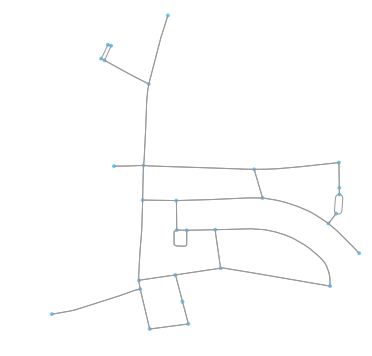

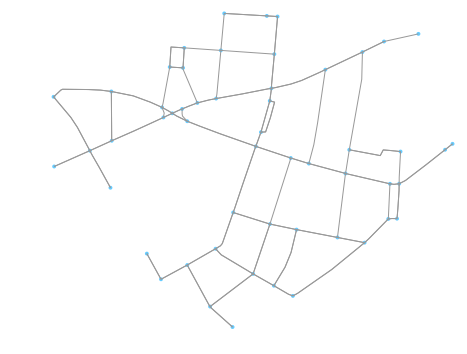

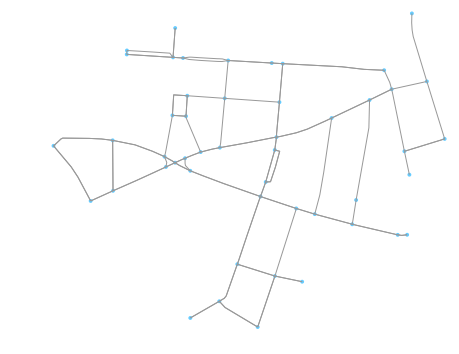

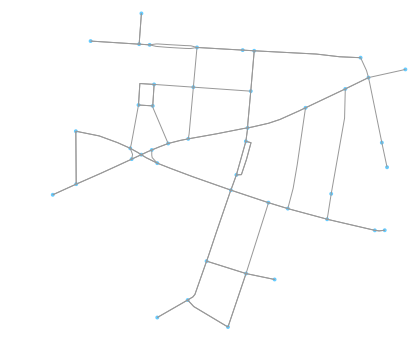

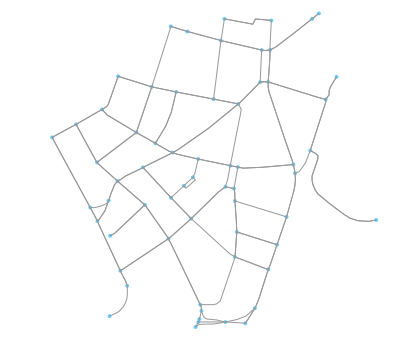

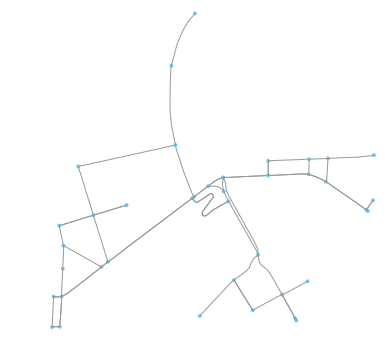

1  data
30
70
{'street_length_total': 4272.764711447487, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 8.7, 'streets_per_node_proportion': {0: 0.0, 1: 0.26666666666666666, 2: 0.2, 3: 2.0, 4: 0.4666666666666667, 5: 0.03333333333333333}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.035910532806273, 'streets_per_node_counts': {0: 0, 1: 8, 2: 6, 3: 60, 4: 14, 5: 1}, 'node_density_km': None, 'm': 70, 'n': 30, 'edge_length_total': 8472.97839496902, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 4.666666666666667, 'street_density_km': None, 'street_segments_count': 36, 'street_length_avg': 118.68790865131908, 'intersection_count': 29, 'edge_length_avg': 121.04254849955744}
2  data
54
134
{'street_length_total': 7063.8790623418245, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 6.388888888888889, 'streets_per_node_proportion': {0: 0.0, 1: 0.037037037037037035, 2: 0.037037037037037035, 3: 1.4444444444444444, 4: 0.462

626
set([71243783, 35348492, 35348501, 75567127, 35348505, 35348506, 35348508, 255948832, 275604144, 255948835, 925538343, 276748328, 255371309, 276748335, 71243844, 667631702, 262391896, 262391898, 287418840, 275955818, 990056556, 252020847, 252020848, 528191602, 275955828, 990056573, 252020863, 3990206596, 3990206598, 278517895, 270585992, 270585994, 255948939, 255948941, 66863246, 1583925404, 1240400031, 4930187425, 1783982251, 4757303468, 519874733, 4757303470, 74983600, 74983601, 74983602, 74983603, 66912438, 278517944, 4918189428, 647495868, 74983615, 74983616, 278517953, 252020933, 2361037002, 35350731, 647495884, 252020943, 35350736, 287600850, 2190493907, 75401429, 75401430, 647516377, 1437761754, 292419805, 720609503, 289675493, 255918312, 255833468, 255949034, 255949035, 255949037, 255949042, 255949045, 255918329, 442007802, 69622015, 647495936, 1280809218, 4930187523, 4930187525, 4930187530, 2040656599, 255947821, 275955985, 275955994, 1579018523, 69042461, 69042462, 647495

121
set([75566593, 75566594, 75566595, 1327268870, 634348042, 255949399, 269333523, 75567127, 270689821, 1251610041, 75567544, 278516785, 252019762, 61871155, 61871156, 61871157, 644746300, 291723849, 252020664, 252019799, 262391896, 262391898, 278516828, 252020320, 66907750, 990056556, 634348142, 990056559, 252020848, 528191602, 69040781, 990056573, 255950468, 278517895, 255948939, 251307458, 504618130, 252019859, 1252410519, 252019864, 252019866, 252019867, 69042461, 1783876552, 1350817460, 278517944, 278517948, 69040831, 278517953, 534868676, 35350730, 35350731, 35350732, 35350736, 287600850, 2190493907, 69041075, 1252410601, 252019946, 252019947, 534868690, 1328432382, 69622015, 438250754, 252019990, 75564364, 75568413, 69042462, 5509661984, 255950471, 255949103, 288747314, 1796468542, 278517055, 269333315, 252020847, 141644, 141646, 75567951, 141648, 75567954, 75567957, 69039446, 75568472, 75566937, 75566938, 1252557160, 252020594, 255949174, 1252557175, 252020092, 69041025, 25202

In [ ]:
#get graph corresponding to each upload
total_before_length=[]
total_before_street=[]
total_after_length=[]
total_after_street=[]
for user in user_individual:
    print "*******************************************************************************"
    print user
    print "*******************************************************************************"
    graphs=[]
    for i in user:
        location=(i[6],i[7])
        G1 = ox.graph_from_point(location, distance=i[4], distance_type='network', network_type='drive')
        fig, ax = ox.plot_graph(G1)
        graphs.append(G1)
        
    
    count=1
    before_length=[]
    before_street=[]
    for i in graphs:
        print count,
        print " data"
        count=count+1
        print len(i.nodes())
        print len(i.edges())
        print ox.basic_stats(i)
        before_length.append(ox.basic_stats(i)['street_length_total'])
        before_street.append(ox.basic_stats(i)['street_segments_count'])
        
    total_before_street.append(before_street)
    total_before_length.append(before_length)


        

        
    graphs1=graphs
    #reversing graph
    graphs1.reverse()
    
    after_length=[]
    after_street=[]
    after_length.append(ox.basic_stats(graphs1[0])['street_length_total'])
    after_street.append(ox.basic_stats(graphs1[0])['street_segments_count'])


    for i in range(len(graphs1)-1):
        print ox.basic_stats(graphs1[i])
        current=graphs1[i]
        previous=graphs1[i+1]
        upload_distance=user[len(user)-i-1][-1]
        longitude=[]
        latitude=[]
        node=[]
        for j in graphs1[i].nodes(data=True):
            for key,value in j[1].items():
                #print (key, value)
                if key=='y':
                    longitude.append(value)
                if key=='x':
                    latitude.append(value)
                if key=='osmid':
                    node.append(value)


        new_nodes=[]
        for j in range(len(longitude)):
            location=(longitude[j], latitude[j])
            intermediate = ox.graph_from_point(location, distance=upload_distance, distance_type='network', network_type='drive')
            #fig, ax = ox.plot_graph(intermediate)
            for nodes1 in intermediate.nodes(data=True):
                if nodes1 not in new_nodes:
                    new_nodes.append(nodes1)

        new_nodes_only=[]
        for j in new_nodes:
            #print i[0]
            new_nodes_only.append(j[0])
        print len(new_nodes_only)
        new_nodes_only_set=set(new_nodes_only)
        print new_nodes_only_set
        print len(new_nodes_only_set)


        # intersection of nodes
        # G8 is the previous graph
        #put all nodes of previous in a set and do intersection
        new_nodes=[]
        for nodes1 in graphs1[i+1].nodes(data=True):
            if nodes1 not in new_nodes:
                new_nodes.append(nodes1)



        g3_nodes_only=[]
        for j in new_nodes:
            #print i[0]
            g3_nodes_only.append(j[0])
        print len(g3_nodes_only)
        g3_nodes_only_set=set(g3_nodes_only)
        print g3_nodes_only_set
        print len(g3_nodes_only_set)


        # set intersection
        intersection_nodes=g3_nodes_only_set.intersection(new_nodes_only_set)
        print intersection_nodes
        print len(intersection_nodes)

        aaa=g3_nodes_only_set & new_nodes_only_set
        bbb= g3_nodes_only_set - new_nodes_only_set

        print "intersection", aaa
        print "difference", bbb
        
        ##new condition if graph independent dont prune as you would be ending up pruning the whole graph..error thrown
        if len(intersection_nodes)>0:
            graphs1[i+1].remove_nodes_from(bbb)
        
        
        print len(graphs1[i+1].nodes())
        #print len(G3_pruned.nodes())

        print ox.basic_stats(graphs1[i+1])
        after_length.append(ox.basic_stats(graphs1[i+1])['street_length_total'])
        after_street.append(ox.basic_stats(graphs1[i+1])['street_segments_count'])
        
    
    after_length.reverse()
    after_street.reverse()
    print "length"
    print len(after_length)

    
    total_after_length.append(after_length)
    total_after_street.append(after_street)








In [185]:
count=1
for i in graphs:
    print count,
    print " data"
    count=count+1
    print len(i.nodes())
    print len(i.edges())
    print ox.basic_stats(i)

1  data
30
65
{'street_length_total': 3719.842432320014, 'self_loop_proportion': 0.03076923076923077, 'streets_per_node_avg': 8.333333333333334, 'streets_per_node_proportion': {0: 0.0, 1: 0.7, 2: 0.13333333333333333, 3: 2.2333333333333334, 4: 0.16666666666666666}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.2069160804908314, 'streets_per_node_counts': {0: 0, 1: 21, 2: 4, 3: 67, 4: 5}, 'node_density_km': None, 'm': 65, 'n': 30, 'edge_length_total': 6132.176764798562, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 4.333333333333333, 'street_density_km': None, 'street_segments_count': 36, 'street_length_avg': 103.32895645333372, 'intersection_count': 26, 'edge_length_avg': 94.34118099690095}
2  data
20
40
{'street_length_total': 3446.7649126082515, 'self_loop_proportion': 0.05, 'streets_per_node_avg': 14.45, 'streets_per_node_proportion': {0: 0.0, 1: 1.15, 2: 0.35, 3: 3.6, 4: 0.45}, 'clean_intersection_count': None, 'inter

In [186]:
graphs1=graphs

In [187]:
#reversing graph
graphs1.reverse()

In [191]:
counts=0
for i in graphs1:
    print len(graphs1)-counts,
    print " data"
    counts=counts+1
    print len(i.nodes())
    print len(i.edges())
    print ox.basic_stats(i)

10  data
82
209
{'street_length_total': 9723.749819254856, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 4.536585365853658, 'streets_per_node_proportion': {0: 0.0, 1: 0.06097560975609756, 2: 0.036585365853658534, 3: 1.0853658536585367, 4: 0.25609756097560976, 5: 0.024390243902439025}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.0228787750540385, 'streets_per_node_counts': {0: 0, 1: 5, 2: 3, 3: 89, 4: 21, 5: 2}, 'node_density_km': None, 'm': 209, 'n': 82, 'edge_length_total': 17931.77326406731, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 5.097560975609756, 'street_density_km': None, 'street_segments_count': 115, 'street_length_avg': 84.55434625439005, 'intersection_count': 79, 'edge_length_avg': 85.79795820127899}
9  data
47
85
{'street_length_total': 5153.461965985452, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 6.872340425531915, 'streets_per_node_proportion': {0: 0.0, 1: 0.14893617021276595, 2: 0.04

In [192]:
graphs1[0].nodes()

NodeView((252019749, 276748328, 61871155, 61871156, 69041205, 252020305, 252020319, 252020320, 252020321, 990056556, 252020847, 528191602, 836712052, 990056573, 252020863, 836712074, 836712083, 1252410519, 252019864, 252019866, 252019867, 1321097885, 252020681, 69040831, 1252557175, 252020943, 252020944, 2190493907, 288704220, 1252410601, 252019946, 252019947, 252019948, 252019949, 252019952, 252019956, 252019964, 252020696, 252019990, 252020697, 5509661984, 75835695, 288747314, 61871157, 69039444, 69039446, 1252557160, 252020594, 252019859, 252020457, 861054329, 252020092, 445083517, 445083520, 69041025, 252020099, 445083528, 990056559, 1234057612, 445083536, 1234057637, 1252557224, 69040554, 69040555, 413487534, 413487535, 69041075, 252020664, 1321097887, 69040572, 252020680, 252019657, 252019661, 71248338, 568060325, 252020708, 252020710, 252019793, 1361212981, 252020665, 1374314999, 288540669))

In [ ]:
for i in range(len(graphs1)-1):
    print ox.basic_stats(graphs1[i])
    current=graphs1[i]
    previous=graphs1[i+1]
    upload_distance=user[len(user)-i-1][-1]
    longitude=[]
    latitude=[]
    node=[]
    for j in graphs1[i].nodes(data=True):
        for key,value in j[1].items():
            print (key, value)
            if key=='y':
                longitude.append(value)
            if key=='x':
                latitude.append(value)
            if key=='osmid':
                node.append(value)


    new_nodes=[]
    for j in range(len(longitude)):
        location=(longitude[j], latitude[j])
        intermediate = ox.graph_from_point(location, distance=upload_distance, distance_type='network', network_type='drive')
        #fig, ax = ox.plot_graph(intermediate)
        for nodes1 in intermediate.nodes(data=True):
            if nodes1 not in new_nodes:
                new_nodes.append(nodes1)

    new_nodes_only=[]
    for j in new_nodes:
        #print i[0]
        new_nodes_only.append(j[0])
    print len(new_nodes_only)
    new_nodes_only_set=set(new_nodes_only)
    print new_nodes_only_set
    print len(new_nodes_only_set)


    # intersection of nodes
    # G8 is the previous graph
    #put all nodes of previous in a set and do intersection
    new_nodes=[]
    for nodes1 in graphs1[i+1].nodes(data=True):
        if nodes1 not in new_nodes:
            new_nodes.append(nodes1)



    g3_nodes_only=[]
    for j in new_nodes:
        #print i[0]
        g3_nodes_only.append(j[0])
    print len(g3_nodes_only)
    g3_nodes_only_set=set(g3_nodes_only)
    print g3_nodes_only_set
    print len(g3_nodes_only_set)


    # set intersection
    intersection_nodes=g3_nodes_only_set.intersection(new_nodes_only_set)
    print intersection_nodes
    print len(intersection_nodes)

    aaa=g3_nodes_only_set & new_nodes_only_set
    bbb= g3_nodes_only_set - new_nodes_only_set

    print "intersection", aaa
    print "difference", bbb


    graphs1[i+1].remove_nodes_from(bbb)
    print len(graphs1[i+1].nodes())
    #print len(G3_pruned.nodes())

    print ox.basic_stats(graphs1[i+1])
    


    

{'street_length_total': 9723.749819254856, 'self_loop_proportion': 0.0, 'streets_per_node_avg': 4.536585365853658, 'streets_per_node_proportion': {0: 0.0, 1: 0.06097560975609756, 2: 0.036585365853658534, 3: 1.0853658536585367, 4: 0.25609756097560976, 5: 0.024390243902439025}, 'clean_intersection_count': None, 'intersection_density_km': None, 'circuity_avg': 1.0228787750540385, 'streets_per_node_counts': {0: 0, 1: 5, 2: 3, 3: 89, 4: 21, 5: 2}, 'node_density_km': None, 'm': 209, 'n': 82, 'edge_length_total': 17931.77326406731, 'clean_intersection_density_km': None, 'edge_density_km': None, 'k_avg': 5.097560975609756, 'street_density_km': None, 'street_segments_count': 115, 'street_length_avg': 84.55434625439005, 'intersection_count': 79, 'edge_length_avg': 85.79795820127899}
('y', 49.6121162)
('x', 6.1073299)
('osmid', 252019749)
('y', 49.6074163)
('x', 6.1017974)
('osmid', 276748328)
('y', 49.6063998)
('x', 6.1064477)
('osmid', 61871155)
('highway', u'traffic_signals')
('y', 49.6072169)

405
set([35348501, 1587861849, 2187358236, 255948832, 361353250, 255948835, 491532326, 308121657, 71243844, 247325366, 262391896, 262391898, 990056556, 990056559, 252020848, 1252557160, 528191602, 75551423, 990056573, 252020863, 278517895, 75567127, 255948941, 66863246, 1833298070, 75550877, 75550878, 1240400031, 74983600, 74983601, 74983602, 74983603, 66912438, 278517944, 71259508, 278517948, 409710781, 74983615, 74983616, 278517953, 252020933, 35350730, 66554059, 35350732, 252020943, 35350736, 287600850, 2190493907, 75401429, 75401430, 71259513, 334385371, 720609503, 255949034, 255949035, 255949037, 255949042, 255949045, 252020982, 442007801, 442007802, 75546878, 69622015, 1280809218, 252021008, 252021012, 69042461, 69042462, 255949103, 3448320314, 276650299, 69041205, 252021058, 141636, 141637, 252021064, 1376883017, 75397450, 141644, 75397453, 141646, 141648, 141651, 141657, 141662, 141663, 66910564, 141672, 255949174, 1252557175, 668860792, 117330309, 1234057612, 670044580, 568060

98
set([1327268870, 634348042, 1374315019, 1374315020, 1280809218, 75546126, 75546127, 1587862036, 270689821, 572543529, 252019762, 291723849, 252019799, 262391896, 66586201, 262391898, 66907750, 634348142, 252020847, 252020848, 528191602, 443497076, 290288257, 255950468, 278517895, 266223240, 651375756, 1098872258, 66863246, 75543184, 504618130, 252019864, 252019867, 1240400031, 66593960, 1783876552, 1350817460, 278517944, 278517948, 278517953, 268552907, 534868676, 35350730, 35350731, 35350732, 35350736, 287600850, 647124693, 75401430, 720609503, 77600490, 534868690, 1232409838, 75547092, 442007802, 75401429, 438250754, 634341123, 527956753, 1474547476, 527956757, 255950471, 71259444, 278517055, 141636, 141637, 634220361, 75397450, 141644, 75397453, 141646, 141648, 75566938, 75545965, 2205912452, 4887471517, 1251610033, 75569075, 75570104, 1251610041, 5373158337, 71248322, 75395016, 66586576, 252019704, 75547090, 1251610068, 442007801, 1251610072, 1251610073, 268555232, 1406764001, 4

In [162]:
for nodes1 in graphs1[1+1].nodes(data=True):
    print nodes1

(290288257, {'y': 49.6143592, 'x': 6.1176077, 'osmid': 290288257})
(438250754, {'y': 49.6115458, 'x': 6.1200749, 'osmid': 438250754})
(634341123, {'y': 49.6136931, 'x': 6.1172068, 'osmid': 634341123})
(278517895, {'y': 49.6108896, 'x': 6.1162934, 'osmid': 278517895})
(266223240, {'y': 49.6151235, 'x': 6.1217206, 'osmid': 266223240})
(1374315019, {'y': 49.6133544, 'x': 6.1195675, 'osmid': 1374315019})
(651375756, {'y': 49.6114686, 'x': 6.1220581, 'osmid': 651375756})
(1280809218, {'y': 49.6151396, 'x': 6.121739, 'osmid': 1280809218})
(75546126, {'y': 49.6143286, 'x': 6.1209024, 'osmid': 75546126})
(527956753, {'y': 49.6150368, 'x': 6.1219736, 'osmid': 527956753})
(527956757, {'y': 49.6150787, 'x': 6.1219875, 'osmid': 527956757})
(270689821, {'y': 49.6088189, 'x': 6.1224336, 'osmid': 270689821})
(1240400031, {'y': 49.6137939, 'x': 6.1192151, 'osmid': 1240400031})
(572543529, {'y': 49.6146962, 'x': 6.1219284, 'osmid': 572543529})
(1251610033, {'y': 49.6129893, 'x': 6.1137999, 'osmid': 125

In [ ]:
a=[1,2]

In [ ]:
a

In [84]:
total_after_length


[[2398.825282817683,
  1926.6010738381797,
  3875.437570998512,
  3280.8871214820338,
  4755.291744988422,
  2789.069760729662,
  5232.5029732844905,
  4549.750867890812,
  5153.461965985452,
  9723.749819254856],
 [3808.6352742873746,
  5539.604735167741,
  7799.7120429293245,
  1939.0891488595146,
  4978.184775054095,
  5031.0489717048595,
  3710.731557058348,
  1407.064022047565],
 [2714.048873563285,
  4172.371103861491,
  2671.7764396712946,
  4927.149769389388,
  5232.5029732844905,
  5402.788722086731,
  5389.923841312418],
 [1507.4420620562744,
  6392.953953981995,
  8198.933937331141,
  5811.035613752026,
  7052.732730306979,
  6590.858688539211],
 [6772.753359717306,
  10027.041567251075,
  8882.750185169542,
  1948.5626042698907,
  1631.4946426414592,
  2338.966280729363]]

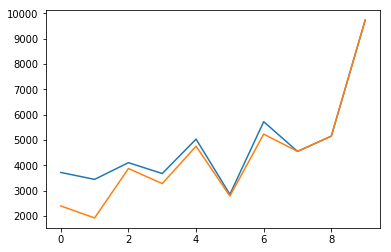

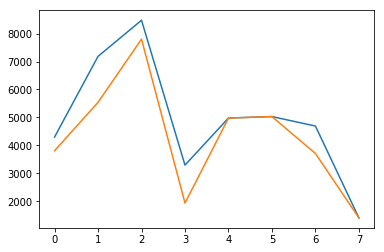

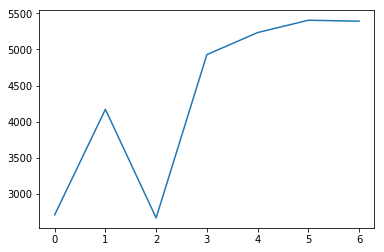

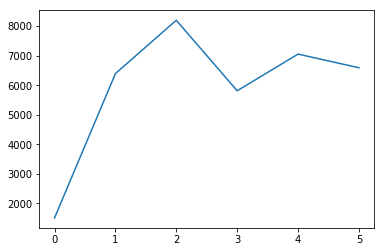

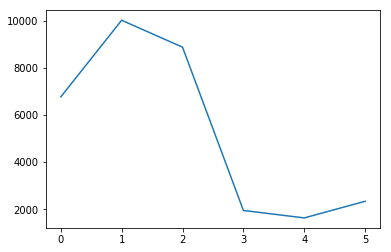

In [92]:
from math import fabs
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.plot(total_before_length[0])
plt.plot(total_after_length[0])
plt.show()

plt.plot(total_before_length[1])
plt.plot(total_after_length[1])

plt.show()

plt.plot(total_after_length[2])
plt.show()

plt.plot(total_after_length[3])
plt.show()

plt.plot(total_after_length[4])
plt.show()

In [87]:
min(total_after_length)

[1507.4420620562744,
 6392.953953981995,
 8198.933937331141,
 5811.035613752026,
 7052.732730306979,
 6590.858688539211]

In [93]:
total_after_street

[[17, 13, 37, 27, 60, 29, 68, 62, 62, 115],
 [51, 71, 78, 30, 63, 55, 52, 28],
 [25, 34, 27, 64, 68, 71, 67],
 [22, 79, 88, 68, 73, 68],
 [75, 118, 86, 20, 16, 38]]